# **CS2302 Data Structures**
**Assignment:** Lab 1 - 2D Lists, Sets, Dictionaries, Backtracking and Sudoku

**Author:** Olac Fuentes

**Modified by:** Daniel Mejia

**Last modified:** October 10, 2024


## Student Information
Before proceeding any further, make sure to create a copy of this notebook and change the information below to match yours.

**Make your own copy of the notebook before working on it!**
> (File > Save a Copy in Drive)


In [ ]:
#@title  { run: "auto", display-mode: "form" }
student_id = "80728076" #@param {type:"string"}
first_name = "Javier" #@param {type:"string"}
last_name = "Ramirez" #@param {type:"string"}

## Academic Integrity Statement
This work is to be done individually. It is not permitted to share, reproduce, or alter any part of this assignment for any purpose. Students are not permitted from sharing code, uploading this assignment online in any form, viewing, receiving, or modifying code written from anyone else. This assignment is part of an academic course at The University of Texas at El Paso and a grade will be assigned for the work produced individually by the student.

## Copyright Notice
This work is protected by U.S. Copyright law. Any redistribution of this work is strictly prohibited.

## Guidelines
**PLEASE READ THIS CAREFULLY!**

This Colab notebook contains all the starter code needed for the lab along with some explanations and hints.

**DO NOT CHANGE ANY OF THE FUNCTION NAMES OR PARAMETERS**

As the code will be auto-graded by another program, changing any of the function names or parameters will result in you getting 0 points for that problem. Therefore do not change any function names or parameters. Feel free to add more functions, test cases, and any other code as long as you do not modify the pre-existing function names.


## Introduction
Sudoku is a popular game that involves logic, deduction and problem solving​​. If you are not familiar with the game, a detailed description can be found here: https://en.wikipedia.org/wiki/Sudoku

For this lab, you will practice using lists, sets and dictionaries and apply backtracking, a very useful algorithm design technique.

The initial version of your program should be able to solve simple Sudoku problems, while the more advanced one, based on backtracking, should be able to solve all problems.

The following Sudoku class provides part of an implementation of a program to store and display a Sudoku puzzle.

In [ ]:
import matplotlib.pyplot as plt
import copy

class Sudoku:

    def __init__(self, A):
        self.S = A
        self.find_neighbors()

    def draw(self, title='', show_rc_nums=False, show_valid_vals=False):
        # Draw lines
        fig, self.ax = plt.subplots(figsize=(8,8))
        for i in range(0,10,3):
            self.ax.plot([i,i],[0,9],linewidth=2,color='k')
            self.ax.plot([0,9],[i,i],linewidth=2,color='k')
        for i in range(1,9):
            self.ax.plot([i,i],[0,9],linewidth=1,color='k')
            self.ax.plot([0,9],[i,i],linewidth=1,color='k')

        # Print row and column numbers if desired
        if show_rc_nums:
            for i in range(9):
                self.ax.text((-.5),(i+.5), str(i), size=12,color = 'r',
                    ha="center", va="center")
                self.ax.text((i+.5),(-.5), str(i), size=12,color = 'r',
                    ha="center", va="center")

        # Print known values
        for i in range(9):
            for j in range(9):
                if self.S[i][j] != 0:
                    self.ax.text((j+.5),(i+.5), str(self.S[i][j]), size=18,
                        ha="center", va="center")

        # Print valid values using small green numbers, if desired
        if show_valid_vals and hasattr(self,'V'):
            for i in range(9):
                for j in range(9):
                    if self.S[i][j] == 0:
                        for n in self.V.get((i,j), []):
                            n1 = n-1
                            self.ax.text((j+.5+(n1%3-1)*.25),(i+.5+(n1//3-1)*.25), str(n), size=10,
                                         color = 'g', ha="center", va="center")

        self.ax.axis('off')
        self.ax.set_title(title, y=-.05,size = 18)
        self.ax.set_aspect(1.0)
        self.ax.invert_yaxis()
        plt.show()

    def find_neighbors(self):
      # This function identifies the neighbors of each cell in a 9x9 Sudoku board, where a neighbor is any cell in the same row, column, or 3x3 subgrid.
      self.N = {} # Initialize dictionary to store neighbors of each cell
      for r in range (9): # Loop over each row
        for c in range (9): # Loop over each column
          neighbors = set() # Initialize a set to store neighbors for cell (r, c)
          for i in range (9):  # Loop to add cells in the same row and column
            if i != r:
              neighbors.add((r, i)) # Add cells in the same row
            if i != c:
              neighbors.add((i, c)) # Add cells in the same column
              # Add all cells in the same 3x3 grid
          start_r, start_c = 3 * (r // 3) , 3 * (c // 3) # Finds the starting row and column of the 3x3 subgrid for cell (r, c).
          for i in range(start_r, start_r + 3): # Loops through each row in the 3x3 subgrid.
            for j in range(start_c, start_c + 3): # Loops through each column in the 3x3 subgrid.
              if(i, j) != (r, c): # Ensures we don't add the cell (r, c) itself as a neighbor.
                neighbors.add((i, j)) # Adds each cell in the 3x3 subgrid (except (r, c)) as a neighbor.


          self.N[(r, c)] = neighbors # Store neighbors of cell (r, c)

    # This function initializes a dictionary to store the set of valid values for each empty cell, taking into account constraints from neighbors
    def init_valid(self):
      # Creating the dicionary
        self.V = {} # Initialize dictionary for valid values
        for r in range(9): # Loop over each row
          for c in range(9):  # Loop over each column
            if self.S[r][c] == 0: # Check if cell is empty
              valid_values = set(range(1, 10)) # Initialize all values as valid
              for nr, nc in self.N[(r, c)]: # Loop over neighbors of (r, c)
                if self.S[nr][nc] != 0:
                  valid_values.discard(self.S[nr][nc])  # Discard used values
              self.V[(r, c)] = valid_values # Store valid values for cell (r, c)
            else:
              self.V[(r, c)] = set # No valid values for non-empty cells


    def solve(self):
    # This function will attempt to solve the Sudoku puzzle using deduction logic
      progress = True

      while progress:
        self.init_valid() # Update valid values for each empty cell
        progress = False # Reset progress tracker

        for r in range(9): # Loop over each cell
            for c in range(9): # Loop over each column cell
                if self.S[r][c] == 0: # If cell is empty
                    valid_values = self.V[(r, c)] # Retrieve the set of valid values for cell (r, c) from the dictionary self.V.
                    if len(valid_values) == 1:  # Check if there's only one possible valid value for this cell.
                        self.S[r][c] = valid_values.pop() # Assign the unique valid value to cell (r, c) by removing it from the set.
                        progress = True # Set progress to True to indicate that a change was made to the board.

        # Check if the board is solved
        if not any(0 in row for row in self.S):
          return 1

    # Attempt to solve using backtracking if deduction was wrong
        if self.solve_backtrack():
          return 1
        else:
          return -1




    def solve_backtrack(self):
         # Recursive backtracking algorithm to solve the puzzle
        empty_cell = None
        r, c = -1, -1 # Find the first empty cell
        for i in range(9): # Loop through each row to find an empty cell.
          for j in range(9):# Loop through each column to find an empty cell.
            if self.S[i][j] == 0: # Check if the cell at (i, j) is empty (contains 0).
              empty_cell = (i, j) # Set empty_cell to the coordinates of the empty cell.
              r, c = i, j # Store row and column indices for the empty cell.
              break  # Exit inner loop once an empty cell is found.
          if empty_cell: # Check if an empty cell has been found.
            break # Exit outer loop as well.

        if not empty_cell: # If no empty cell was found, the puzzle is solved.
            return True


        self.init_valid() # Initialize or update valid values for each empty cell.

        for val in self.V[(r, c)]: # Iterate over each valid value for the selected empty cell (r, c).
          is_safe = True # Assume the current value is safe to assign.
          for nr, nc in self.N[(r, c)]: # Loop through each neighbor of cell (r, c).
            if self.S[nr][nc] == val:# Check if any neighbor already contains the value.
              is_safe = False # If so, mark the value as unsafe and exit loop.
              break
          if is_safe: # If the value is safe, proceed to assign it to cell (r, c).
            self.S[r][c] = val # Place the safe value in cell (r, c).
            if self.solve_backtrack():# Recursively call solve_backtrack to continue solving.
              return True # If the recursive call returns True, the puzzle is solved.
            self.S[r][c] = 0 # If not solved, reset cell (r, c) to empty (backtrack).

        return False # If no valid value works, return False to backtrack further.



We will represent a Sudoku puzzle with a 2D array. If a given cell has already been filled, the corresponding array entry will contain the number in the cell; otherwise it will contain 0.

Running the following cells shows an example of creating and displaying a  Sudoku object.


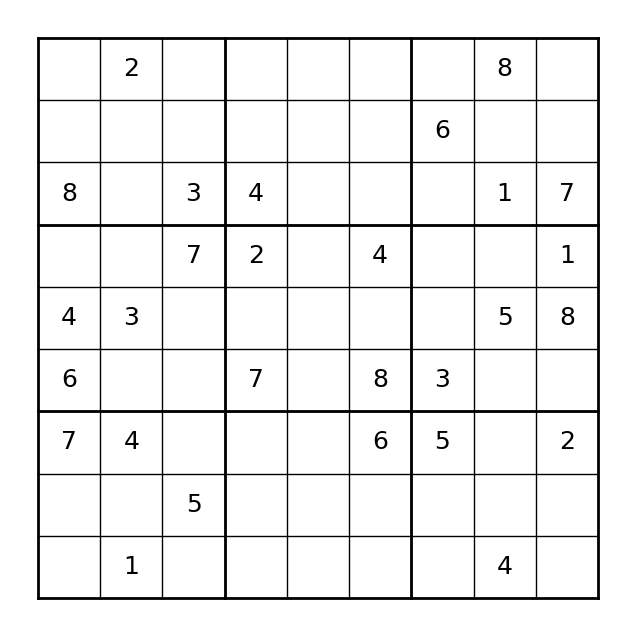

In [ ]:
B = [[0, 2, 0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0], [8, 0, 3, 4, 0, 0, 0, 1, 7],
    [0, 0, 7, 2, 0, 4, 0, 0, 1], [4, 3, 0, 0, 0, 0, 0, 5, 8], [6, 0, 0, 7, 0, 8, 3, 0, 0],
    [7, 4, 0, 0, 0, 6, 5, 0, 2], [0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 4, 0]]
S = Sudoku(B)
S.draw()

We can also display the row and column numbers to make analysis easier.

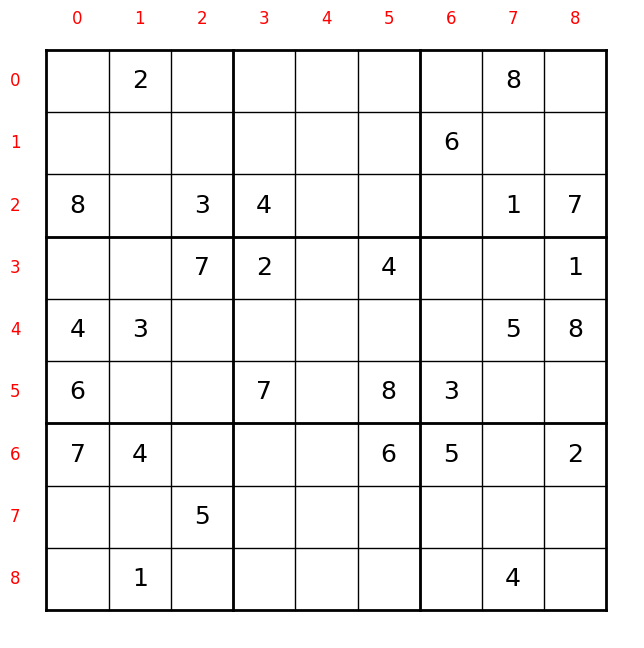

In [ ]:
S.draw(show_rc_nums=True)

When solving a Sudoku by hand, we often write the numbers that can be placed in every empty cell, hoping to find a cell where only one number can be placed.

For the puzzle above, we would obtain the following:

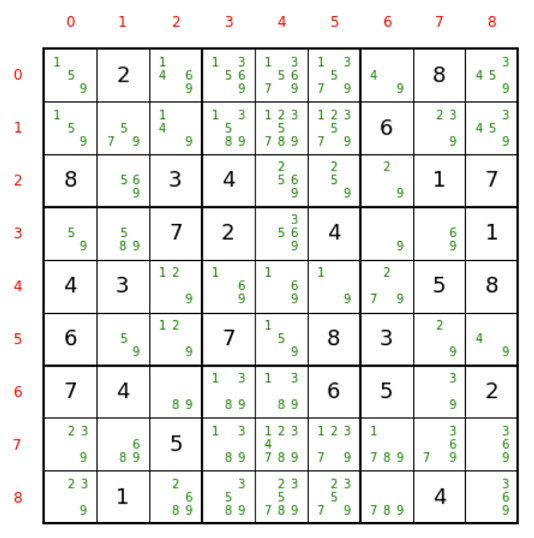

How was this obtained?

For every empty cell, we start with a set of all possible values. Then we remove the values that are present in the same row, column and region. The remaining values are the legal values.

For example, consider cell (4,5)

Initially S = {1,2,3,4,5,6,7,8,9}

We now remove from S the numbers that are in row 4, which are {4,3,5,8}

We are left with S = {1,2,6,7,9}

We now remove the elements of S that are in column 5 (which contains {4,8,6}]).

We are left with S = {1,2,7,9}

We now remove the elements of L that are in the same 3-by-3 region as cell (4,5) (which contains {2,4,7,8}).

We are left with S = {1,9}

Notice that S cannot be empty, unless the puzzle is unsolvable.

What happens if S has a single number? Then we know that that number should be placed in that cell.

For example, in the image above, we know that 9 should be placed in cell (3,6).

The code provided will draw the valid numbers in the corresponding cells, but the initial version of the valid numbers function just returns all integers from 1 to 9. It will be your job to write that function correctly.

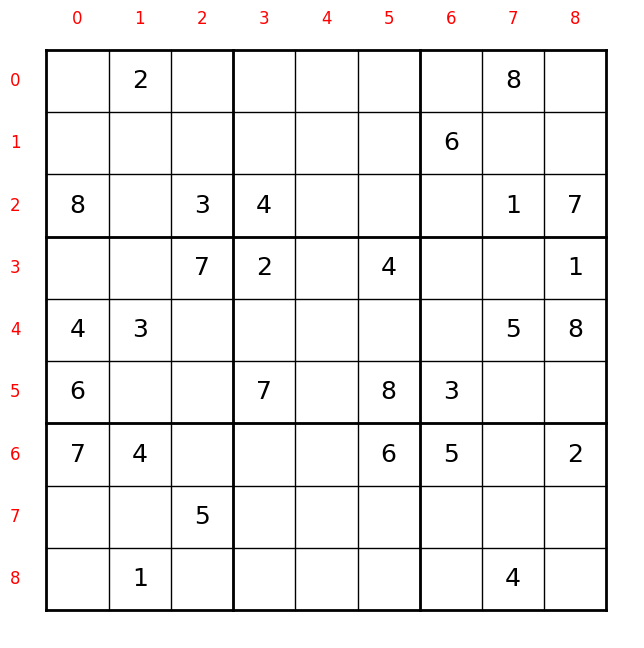

In [ ]:
S.draw(show_rc_nums=True, show_valid_vals=True)

## Your assignment

### Part 1

In this part you will implement functions for reading and storing puzzles and for extracting data to solve them.

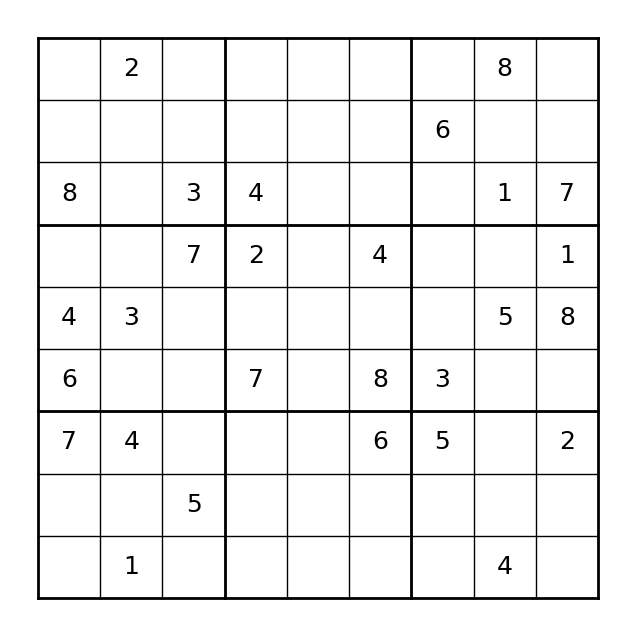

In [ ]:
s = [[0, 2, 0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0], [8, 0, 3, 4, 0, 0, 0, 1, 7],
    [0, 0, 7, 2, 0, 4, 0, 0, 1], [4, 3, 0, 0, 0, 0, 0, 5, 8], [6, 0, 0, 7, 0, 8, 3, 0, 0],
    [7, 4, 0, 0, 0, 6, 5, 0, 2], [0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 4, 0]]
S = Sudoku(s)
S.draw()

**1)** Implement the function *find_neighbors* that fills out a dictionary *N* where *N[(r,c)]* contains the set of cells that cannot hold the same value as cell *(r,c)*.

Notice that for all *(r,c)*, *N[(r,c)]* must contain exactly 20 elements.

Why? For cell *(r,c)*, there are 8 cells in the same region as *(r,c)* (not counting *(r,c)*), there are also 6 cells in row *r* that are not in the same region as *(r,c)* and 6 cells in column *c* that are not in the same region as *(r,c)*.



In [ ]:
s = [[0, 2, 0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0], [8, 0, 3, 4, 0, 0, 0, 1, 7],
    [0, 0, 7, 2, 0, 4, 0, 0, 1], [4, 3, 0, 0, 0, 0, 0, 5, 8], [6, 0, 0, 7, 0, 8, 3, 0, 0],
    [7, 4, 0, 0, 0, 6, 5, 0, 2], [0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 4, 0]]
S = Sudoku(s)
S.find_neighbors()
print(S.N.keys())
print(S.N[(0,0)])
print(len(S.N[(0,0)]))

dict_keys([(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)])
{(4, 0), (8, 0), (0, 2), (0, 5), (2, 2), (1, 0), (0, 8), (3, 0), (5, 0), (0, 1), (0, 7), (1, 2), (0, 4), (2, 1), (7, 0), (1, 1), (0, 3), (2, 0), (0, 6), (6, 0)}
20


**2)** Implement the function *init_valid()* that fills out a dictionary *V* such that *V[(r,c)]* contains the set of numbers that can be written in cell *(r,c)* without breaking any of the rules.



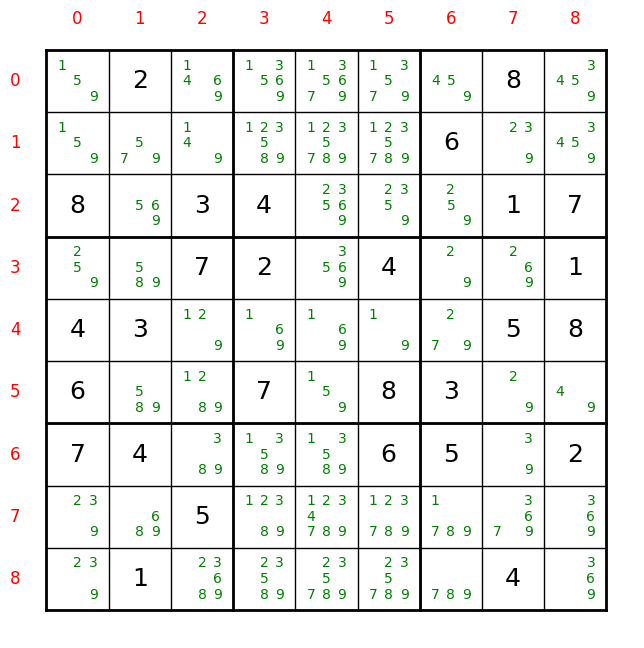

{1, 5, 9}
{2, 9}


In [ ]:
s = [[0, 2, 0, 0, 0, 0, 0, 8, 0], [0, 0, 0, 0, 0, 0, 6, 0, 0], [8, 0, 3, 4, 0, 0, 0, 1, 7],
    [0, 0, 7, 2, 0, 4, 0, 0, 1], [4, 3, 0, 0, 0, 0, 0, 5, 8], [6, 0, 0, 7, 0, 8, 3, 0, 0],
    [7, 4, 0, 0, 0, 6, 5, 0, 2], [0, 0, 5, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 4, 0]]
S = Sudoku(s)
S.find_neighbors()
S.init_valid()
S.draw(show_rc_nums=True, show_valid_vals=True)
print(S.V[(0,0)])
print(S.V[(3,6)])

How to find the valid values?

For every cell *(r,c)* in the puzzle, initialize *V[(r,c)]* with all valid values *(V[(r,c)] = set(range(1,10)))*

For every filled cell in the original puzzle (such that *S.S[r][c] !=0*), remove *S.S[r][c]* from all neighbors of *(r,c)* (that is, all cells in *N[(r,c)]*)..

For example, consider an initial puzzle with only one filled cell, as shown below.

All '2's are removed from the valid sets of the cells in the same row, column, and region as cell (0,1).

s = [[0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


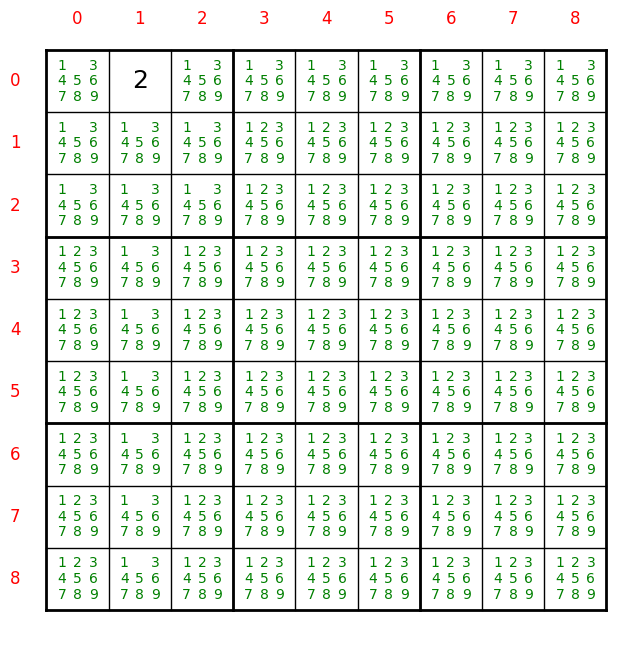

In [ ]:
s = [[0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
print('s =',s)
S = Sudoku(s)
S.find_neighbors()
S.init_valid()
S.draw(show_rc_nums=True, show_valid_vals=True)

### Part 2

In this part you will implement a strategy for solving some simple puzzles.

Implement the function *solve()* that attempts to solve the puzzle using the strategy described below.



```
solve()
  Compute the set of valid values V[(r,c)] for every cell (r,c).
  known = set()
  For every cell whose set of valid values has length 1, add (val, r, c) to the known set, where val is the (only) element of set V[(r,c)].
  while known set is not empty:
    (val,r,c)  = known.pop() # Remove an element from known set
    S[r,c] = val             # Set value in puzzle  
    V[(r,c)] = set()         # Make the candidate set for cell (r,c) empty, since it has already been filled.  
    update sets              # Remove val from all sets that are in the same row, column or region as cell (r,c). Add to known set all sets whose length is reduced to 1 by this update.
  
  If the puzzle has been solved (that is, all cells in S are filled), return 1
  If there is a cell (r,c) that has not been filled but whose set of valid values is empty, return -1
  Return 0 - the puzzle has not been solved, but it still may have a solution

```



easy21.txt: [easy21.txt](https://drive.google.com/file/d/134lF_ksWmD_QX2wWf4ng2OX0f9xojG8p/view?usp=sharing)

hard1000.txt: [hard1000.txt](https://drive.google.com/file/d/19uqNlkhwHi-mOJ_k9lRrhjUsTHSicxu3/view?usp=sharing) (Note: There are only 10 puzzles)

Upload easy21.txt file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving easy21.txt to easy21.txt


All puzzles in file "easy21.txt", except for the last one, are solvable.



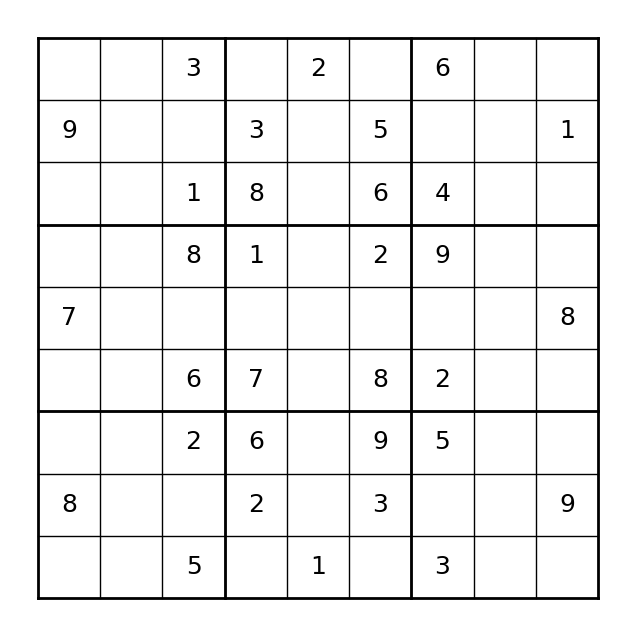

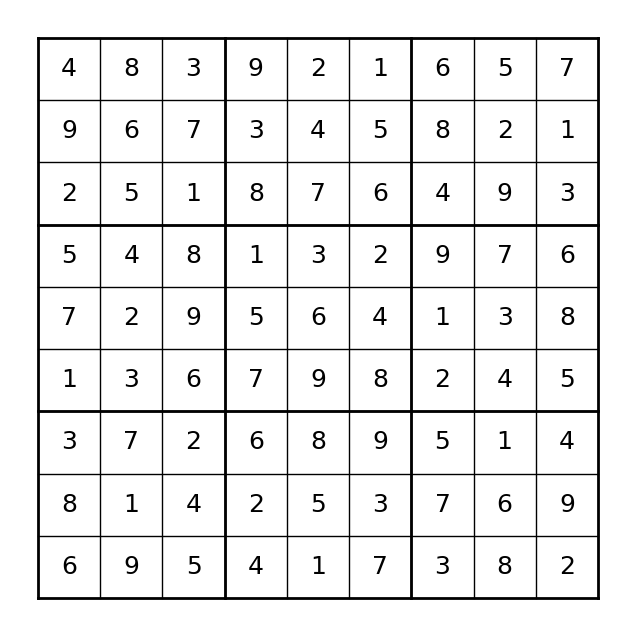

1



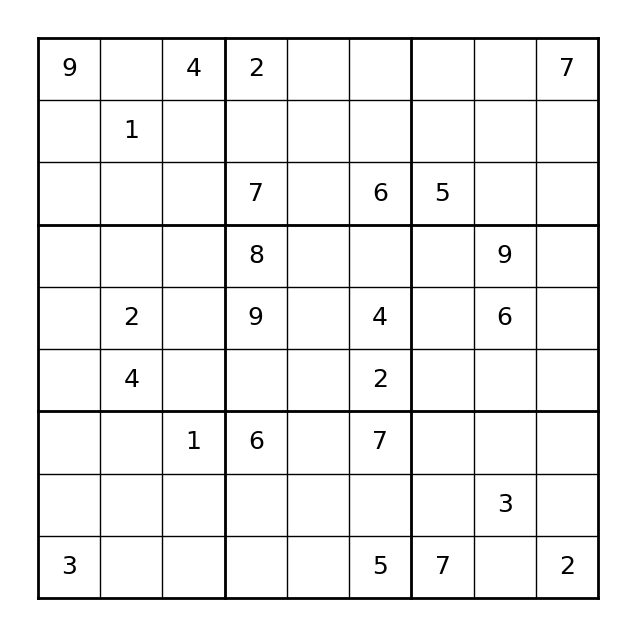

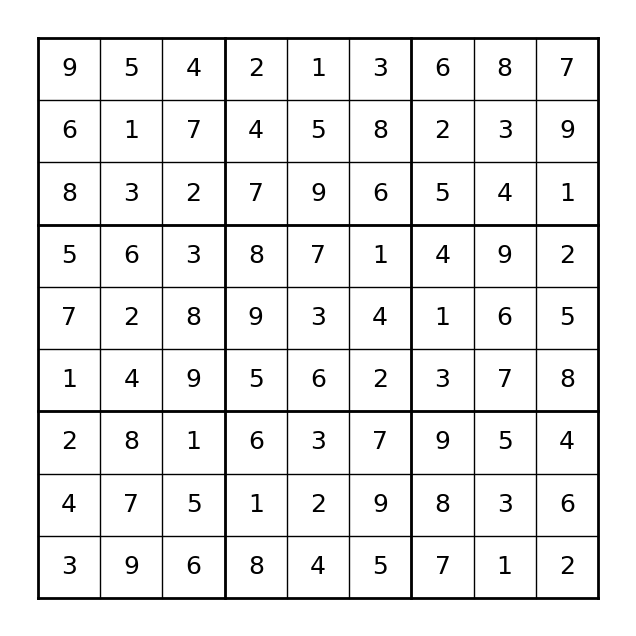

1



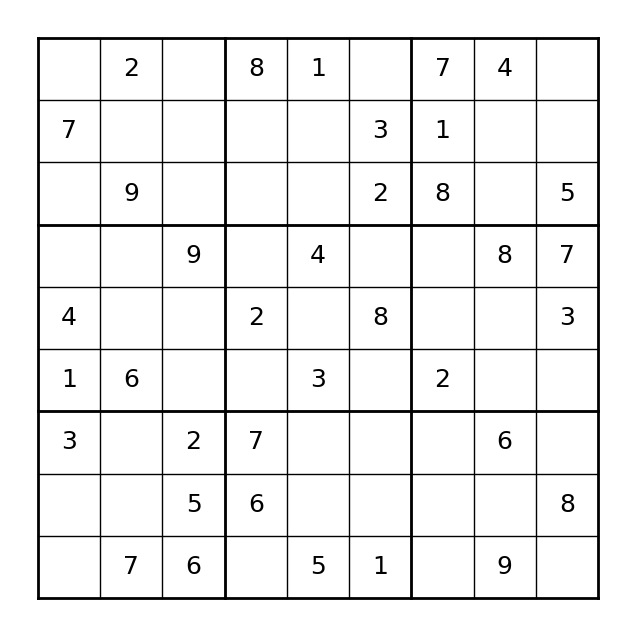

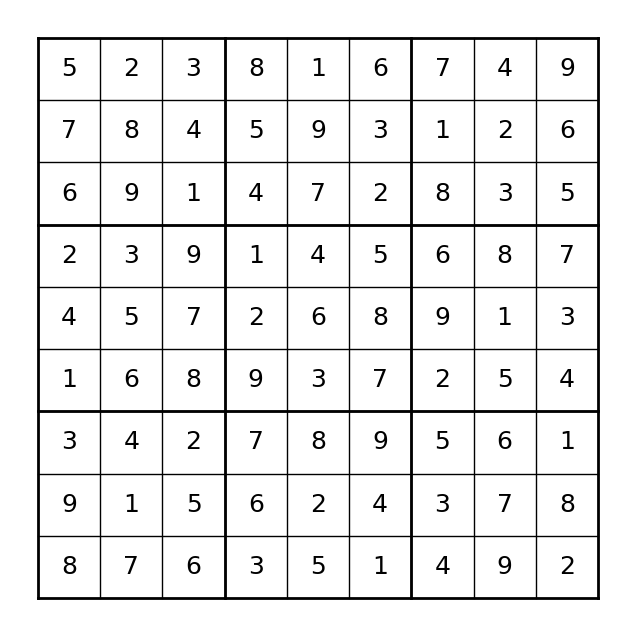

1



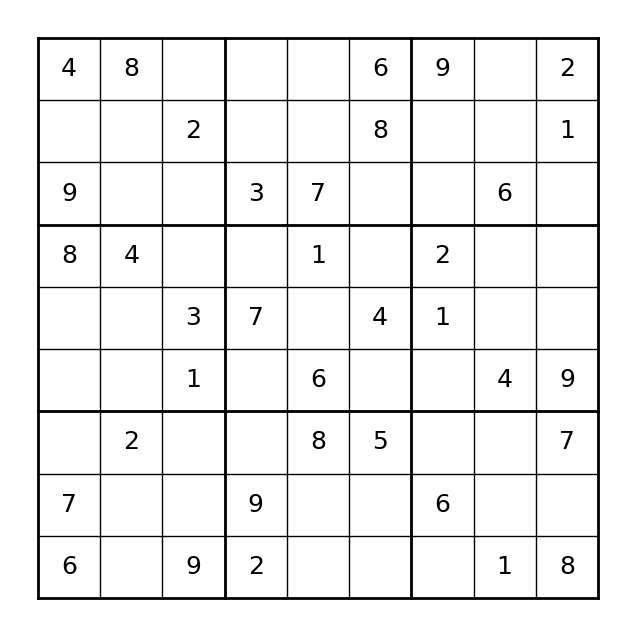

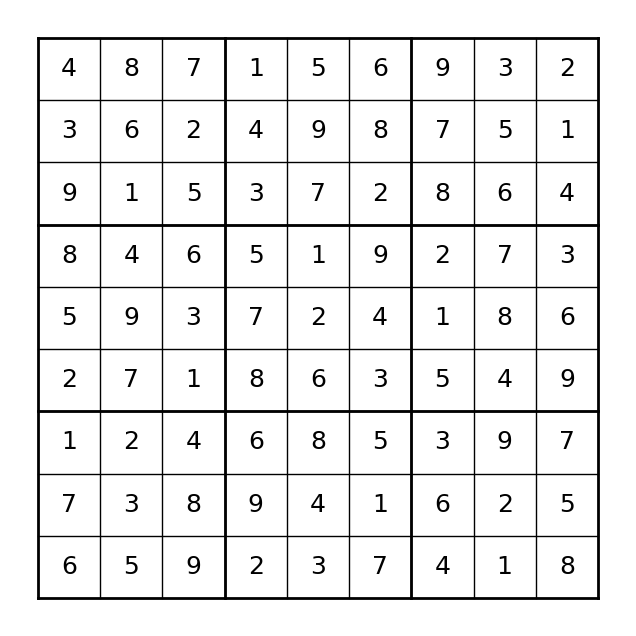

1



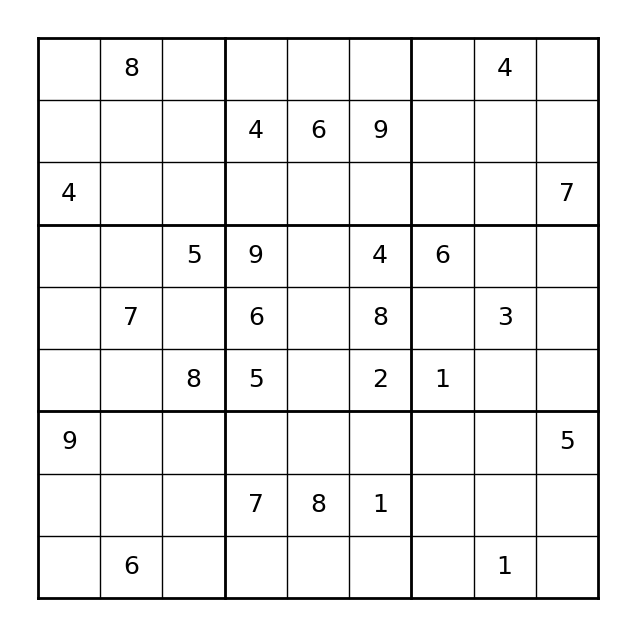

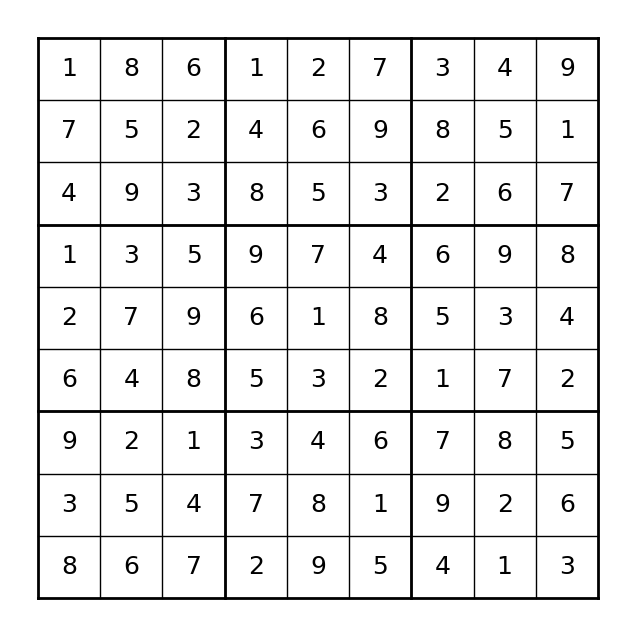

1



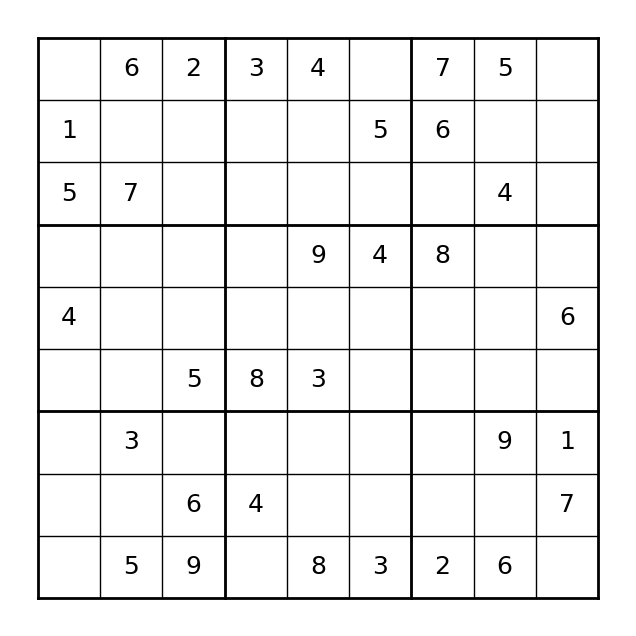

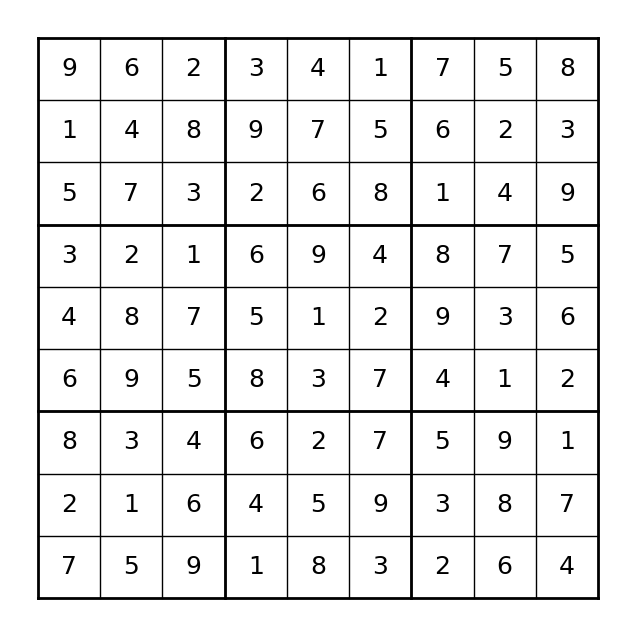

1



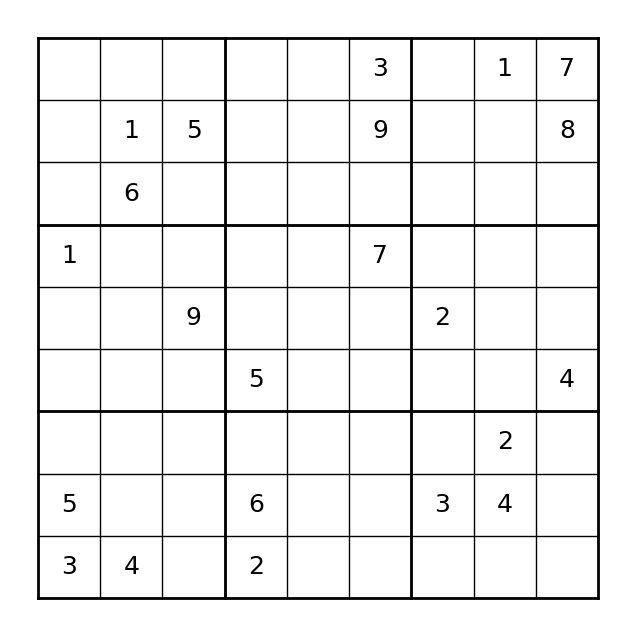

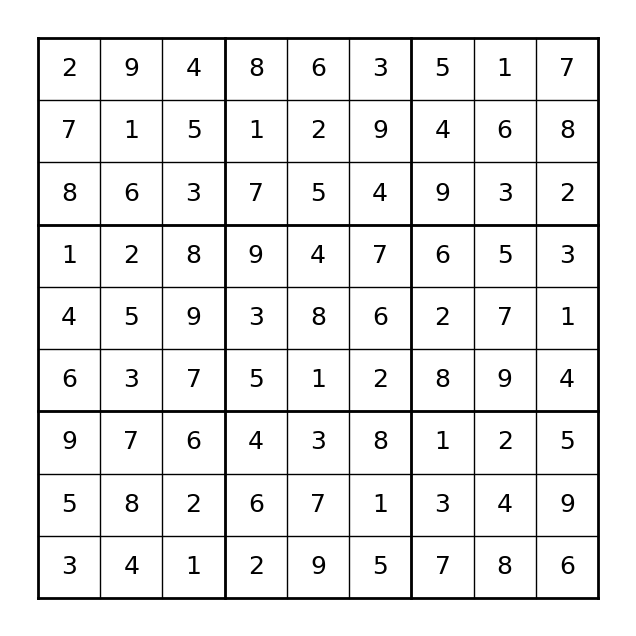

1



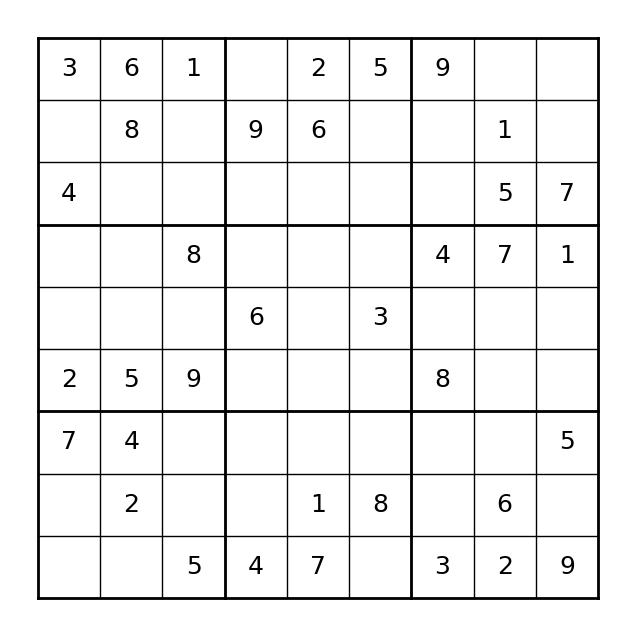

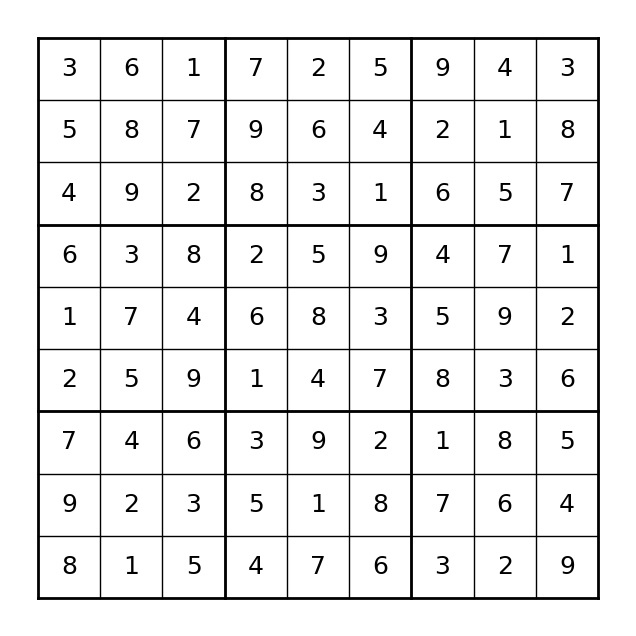

1



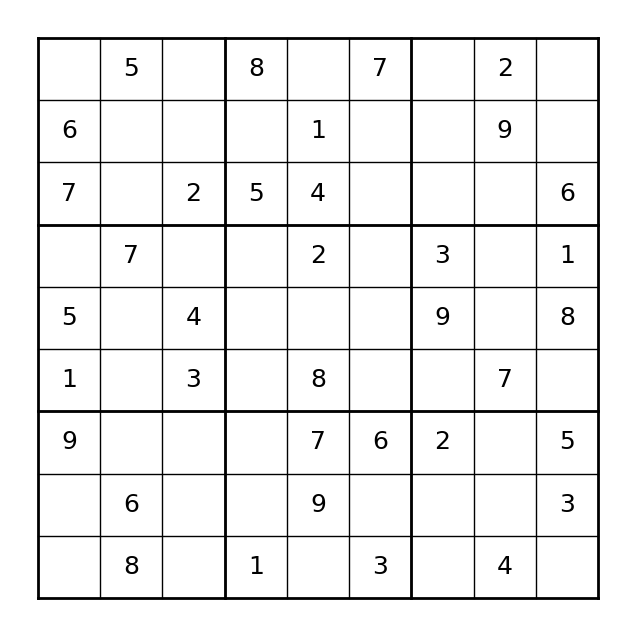

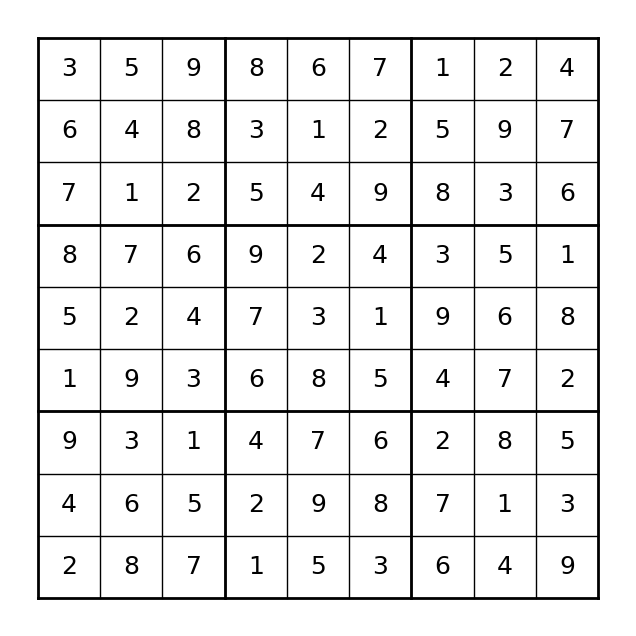

1



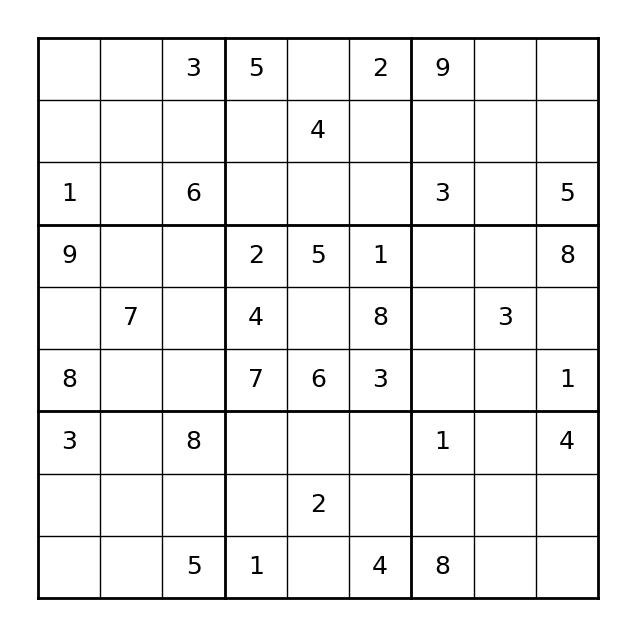

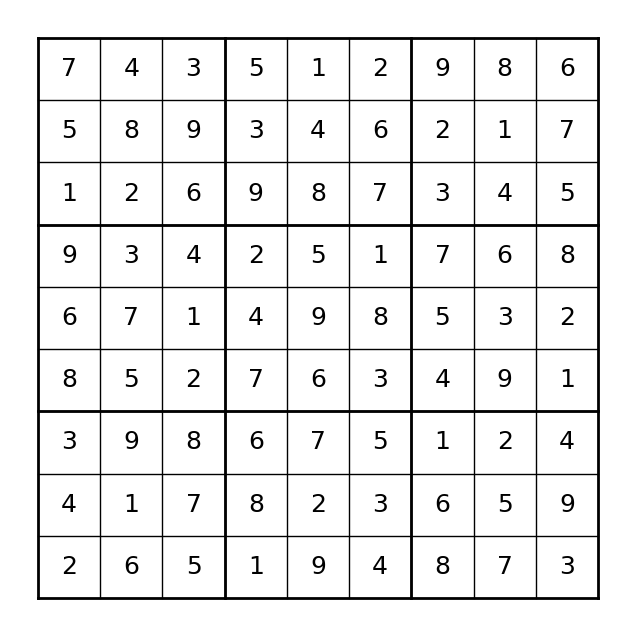

1



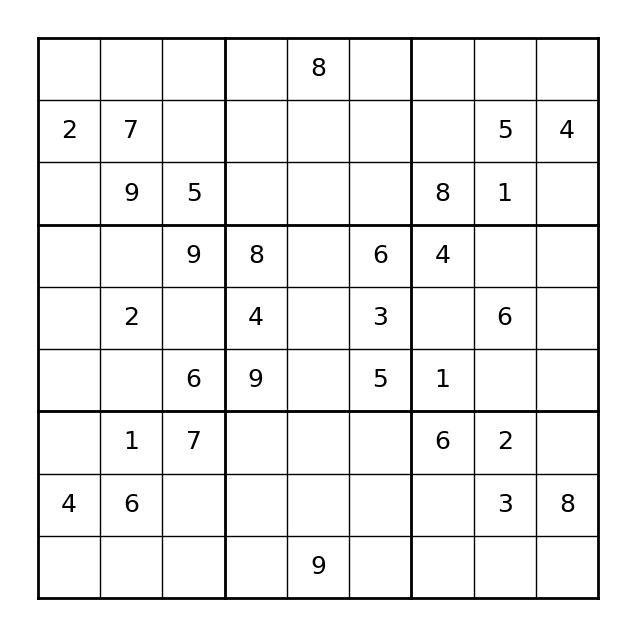

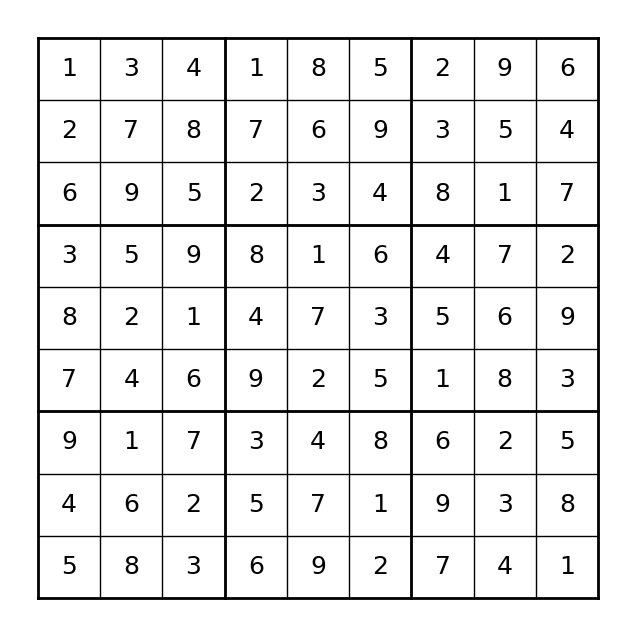

1



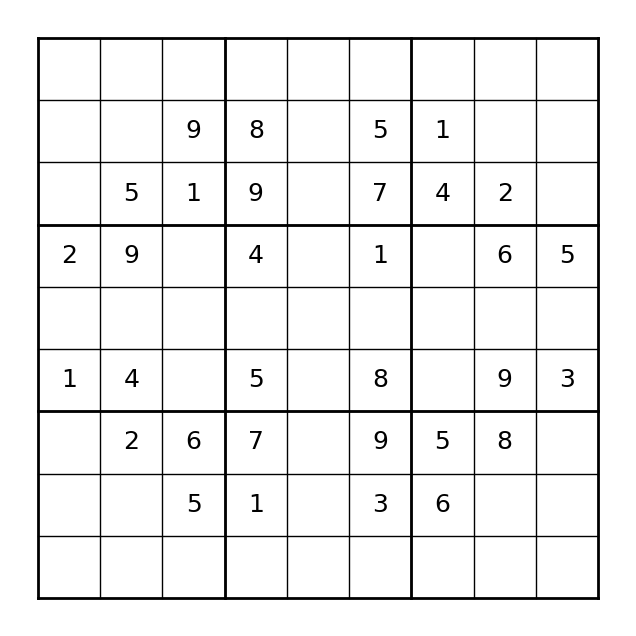

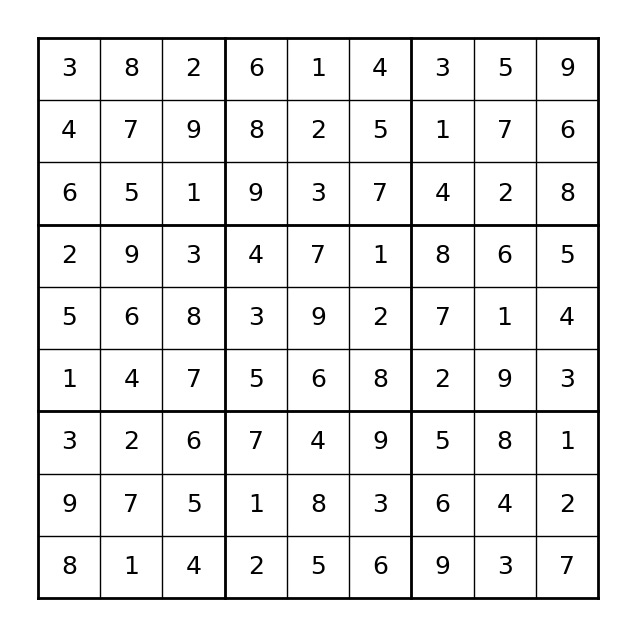

1



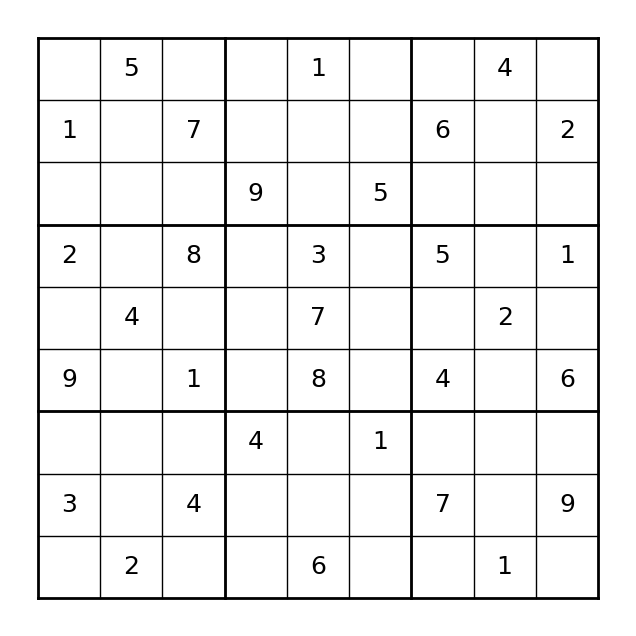

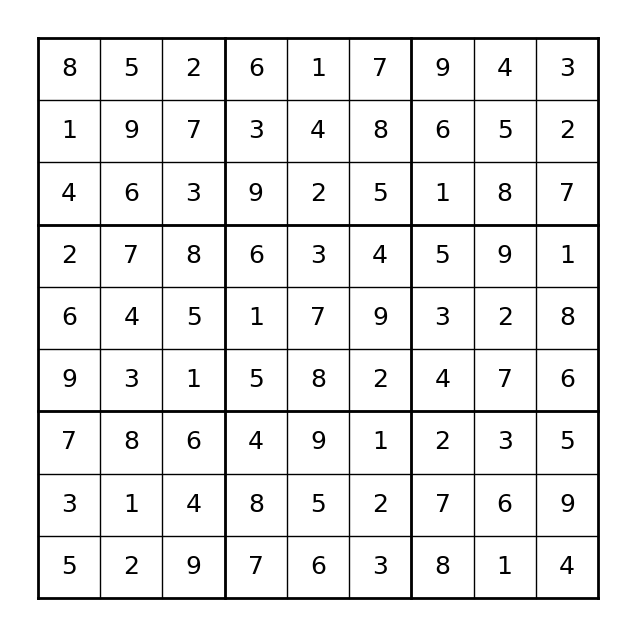

1



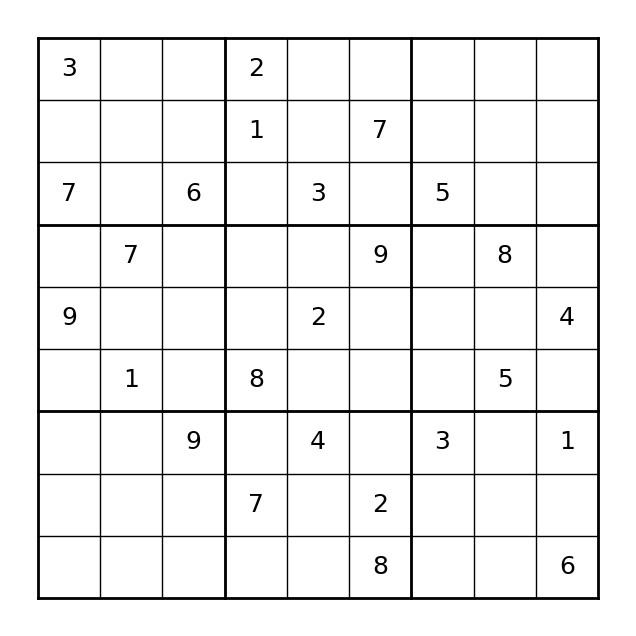

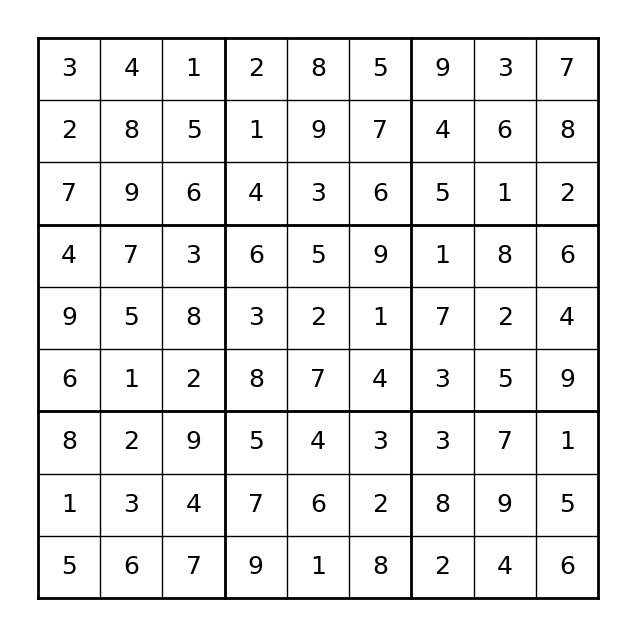

1



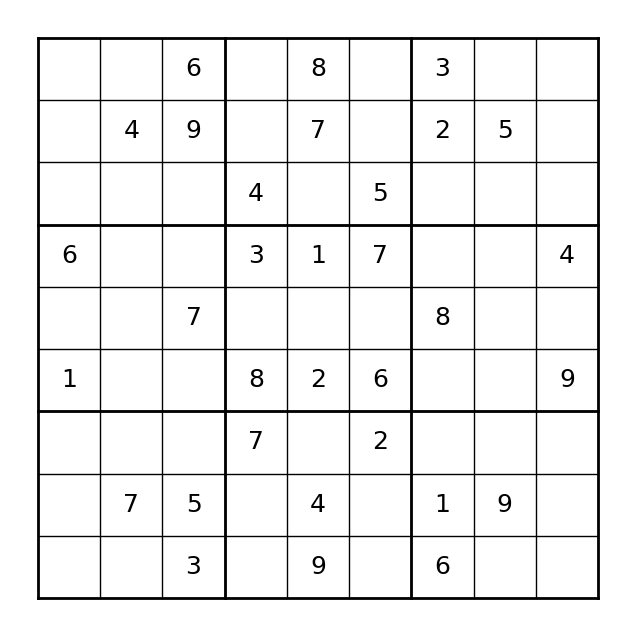

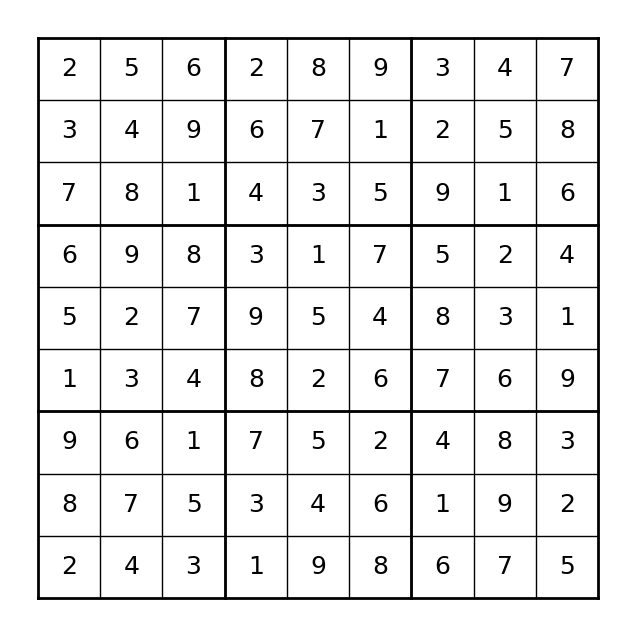

1



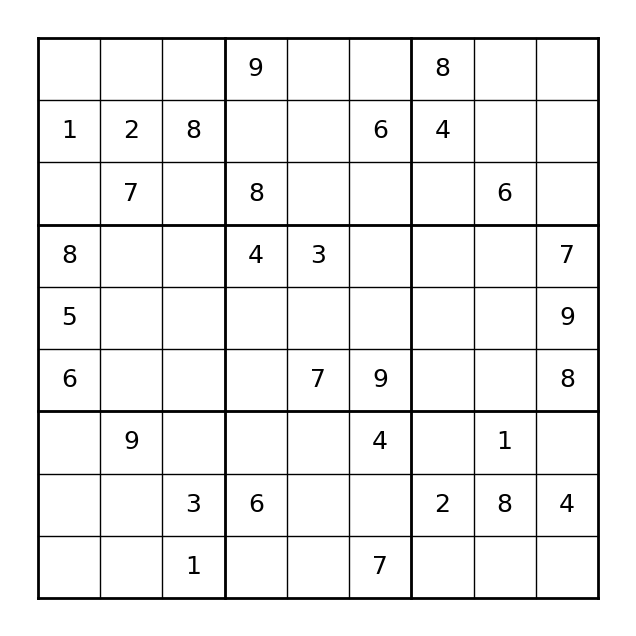

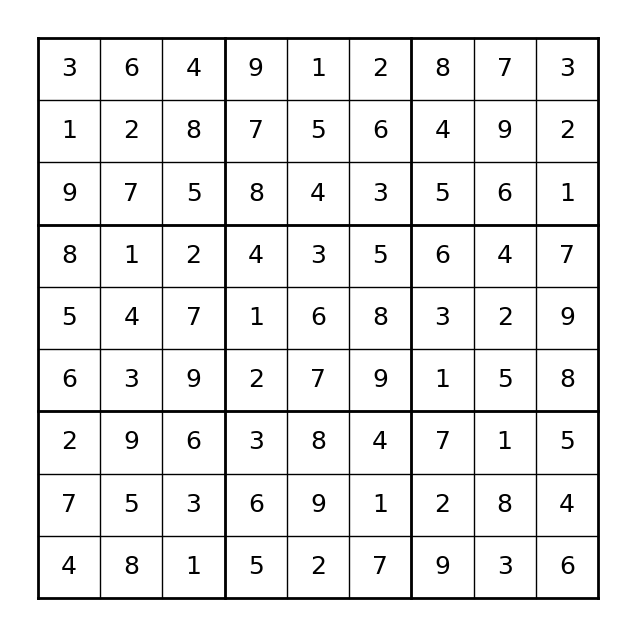

1



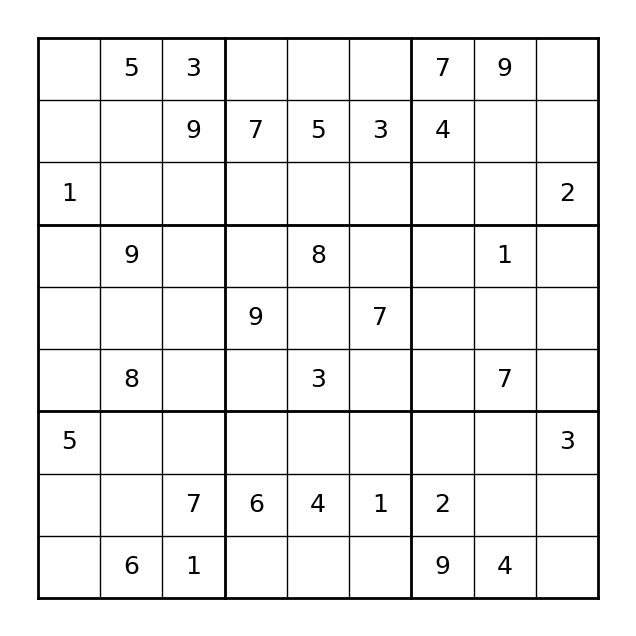

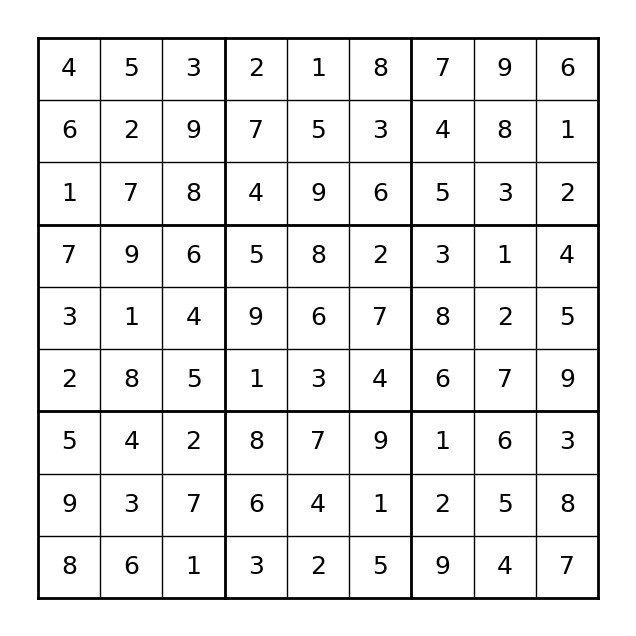

1



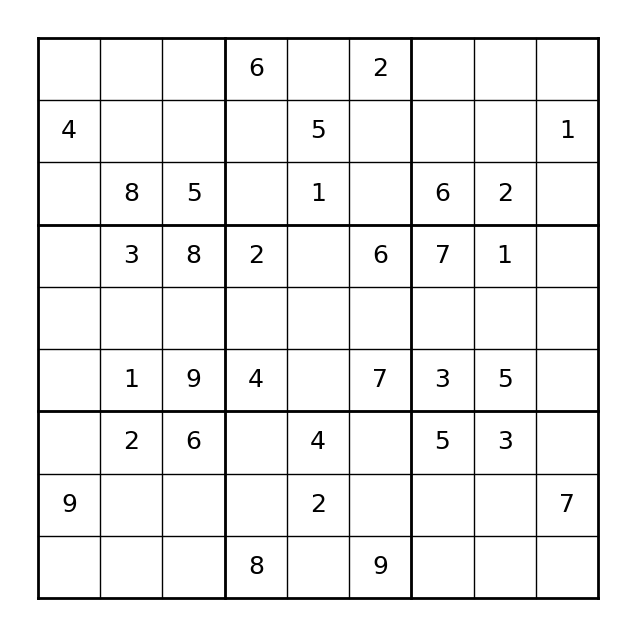

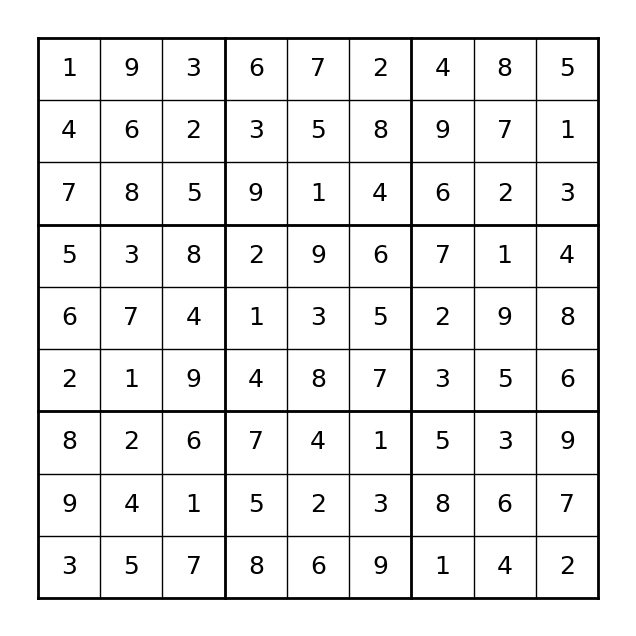

1



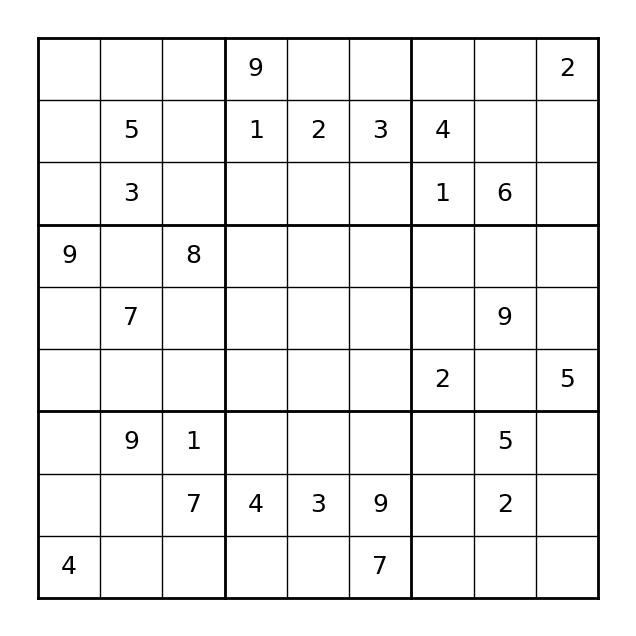

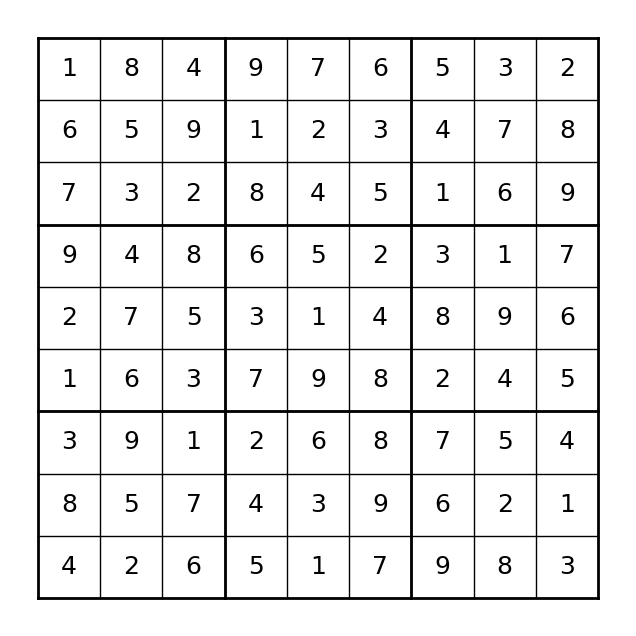

1



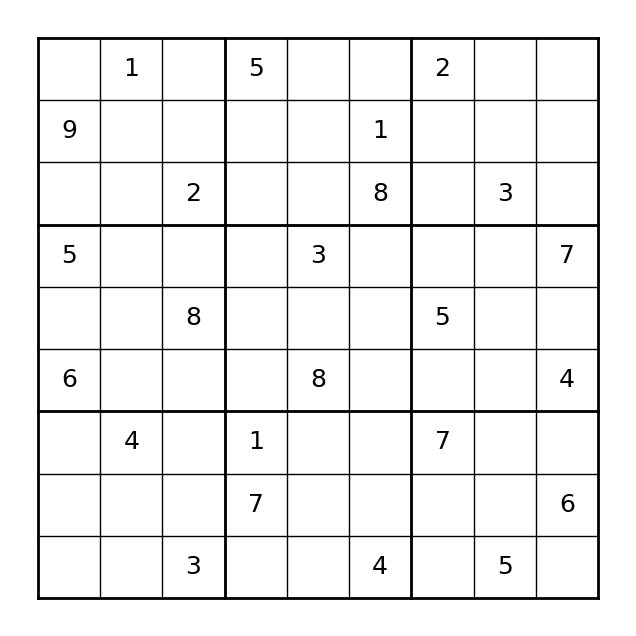

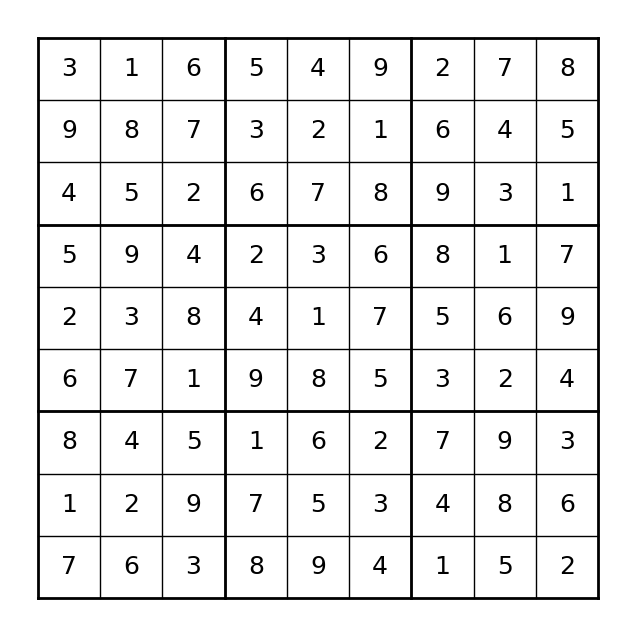

1



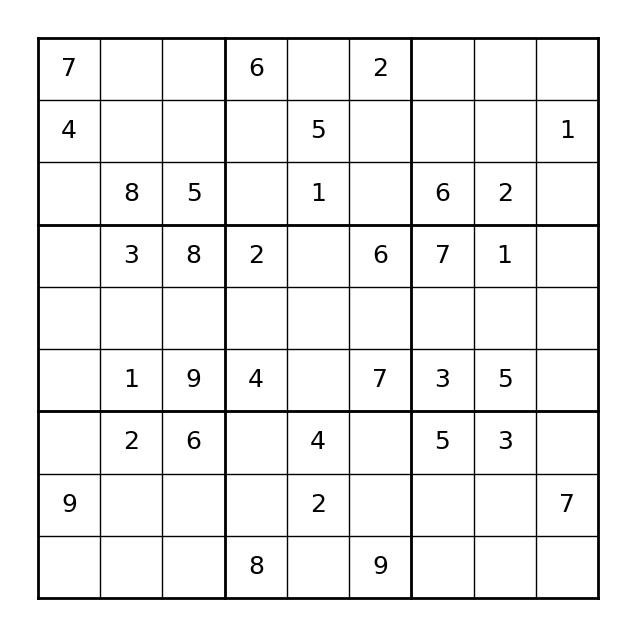

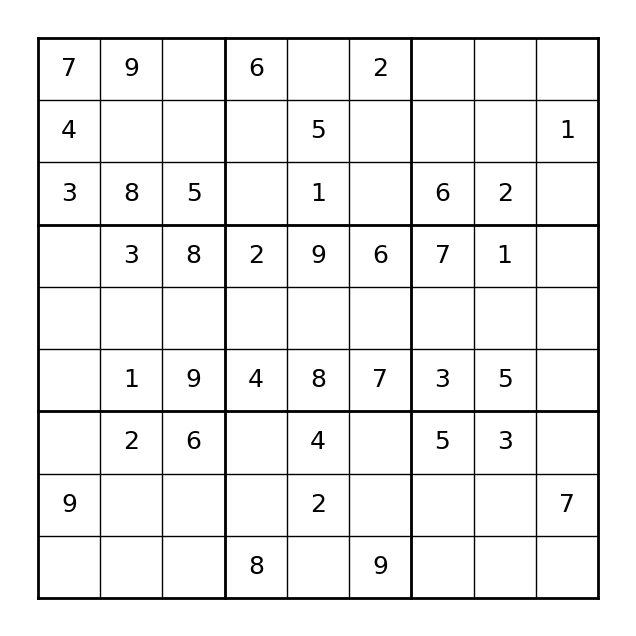

-1

solved puzzles: 20
unsolved puzzles: 0
unsolvable puzzles: 1


In [ ]:
f = open("easy21.txt", "r")
count = [0,0,0]
ss = [s for s in f.read().split('\n')]


def convert_to_board(s):
  board = []
  counter = 0
  row = []
  for c in s:
    if counter == 9:
      board.append(row)
      row = []
      counter = 0
    if c != '.':
      row.append(int(c))
    else:
      row.append(0)
    counter += 1
  if row:
    board.append(row)
  return board

for s in ss:
  board = convert_to_board(s)
  S = Sudoku(board)
  S.draw()
  sol = S.solve()
  S.draw()
  print(sol)
  print()
  count[sol]+=1

print('solved puzzles:',count[1])
print('unsolved puzzles:',count[0])
print('unsolvable puzzles:',count[-1])

### Part 3
In this part you will implement a strategy for solving all solvable puzzles using backtracking.

If there are no cells with a single valid value, we have to guess among the valid values in a given cell; if the guess works, we return the result, otherwise we backtrack.

For example, consider the following attempted solution:

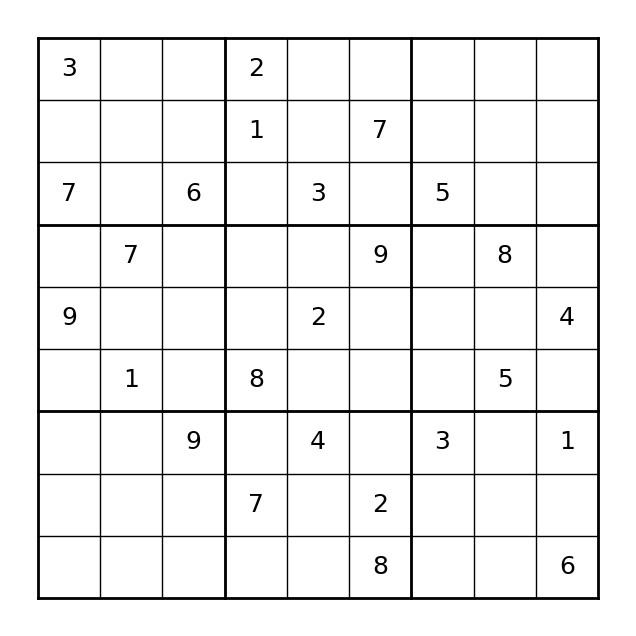

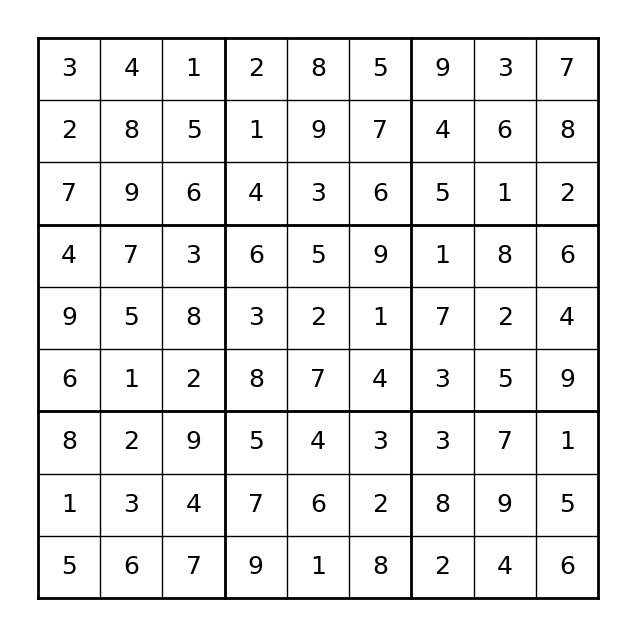

In [ ]:
s='3..2........1.7...7.6.3.5...7...9.8.9...2...4.1.8...5...9.4.3.1...7.2........8..6'
board = convert_to_board(s)
S = Sudoku(board)
S.draw()
sol = S.solve()
S.draw(show_valid_vals=True)



At this point, we cannot make any progress, since all cells have at least 2 valid values.

We can solve the puzzle using a backtracking approach as follows:

Choose a cell that has not been filled:

Suppose we pick cell (0,5), with valid values {5,6}.

First we assume the correct value is 5, then try to find a solution for

s = '3..2.**5**......1.7...7.69345...7...9.8.9...2...4.1.8...5...9.4.3.1...7.2........8..6'

If we find a solution, we are done, otherwise we assume the correct value is

s = '3..2.**6**......1.7...7.69345...7...9.8.9...2...4.1.8...5...9.4.3.1...7.2........8..6'

and try to find a solution for that.

If neither solution works, the puzzle has no solution.

The following pseudocode can be used as a guide to implement backtracking.


```
def solve_backtrack(self):
  if sol == 1: # Solution found
    return sudoku.to_string()
  if sol == -1: # Solution found
    return None
  find unfilled cell (r,c) in self.S
  for every value v in V[(r,c)]:
    assume self.S[r][c] = v
    sol = self.solve_backtrack()
    if sol != None:
        return sol
  return None
```


21 strings read


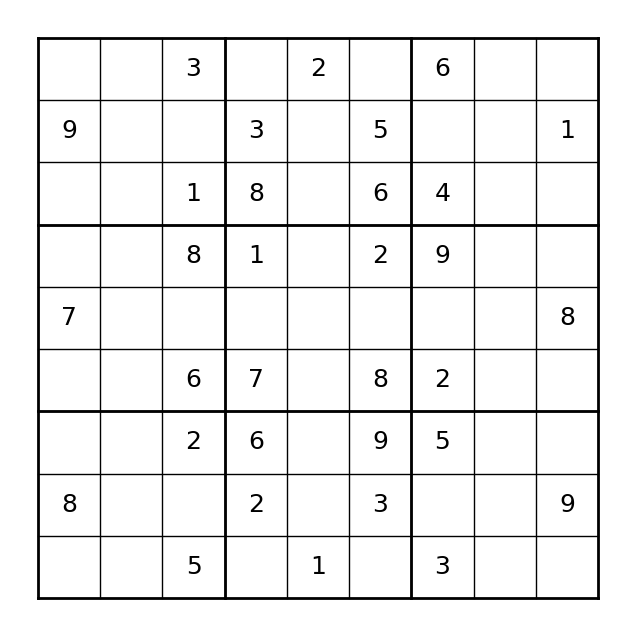

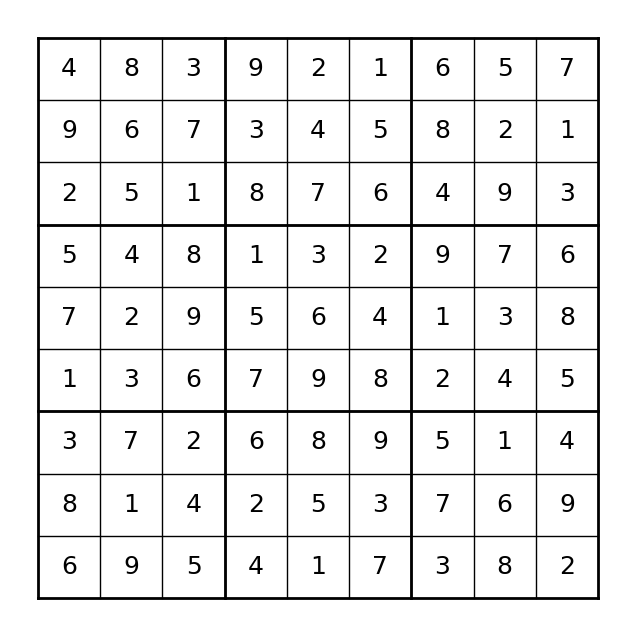

True


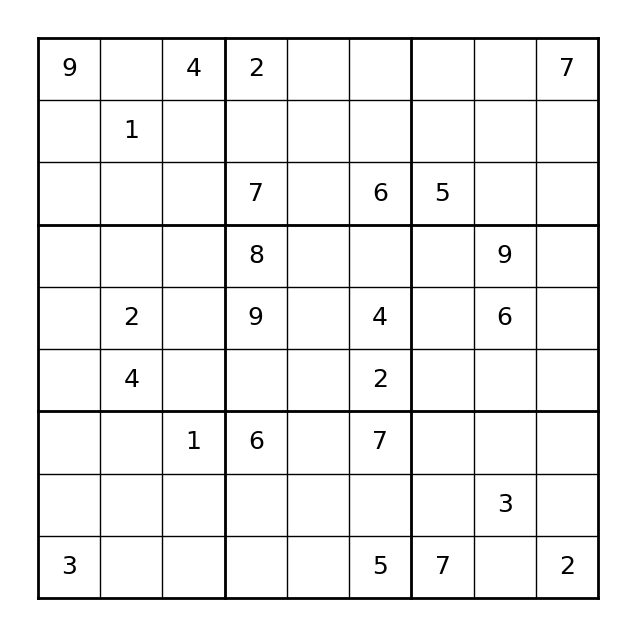

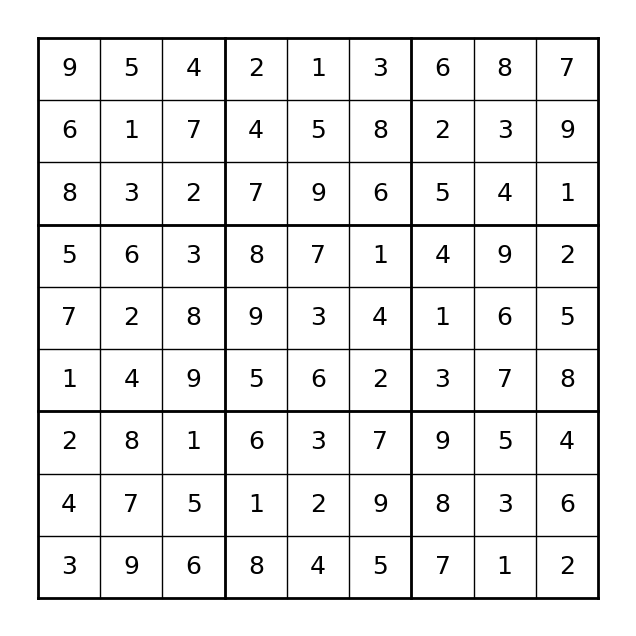

True


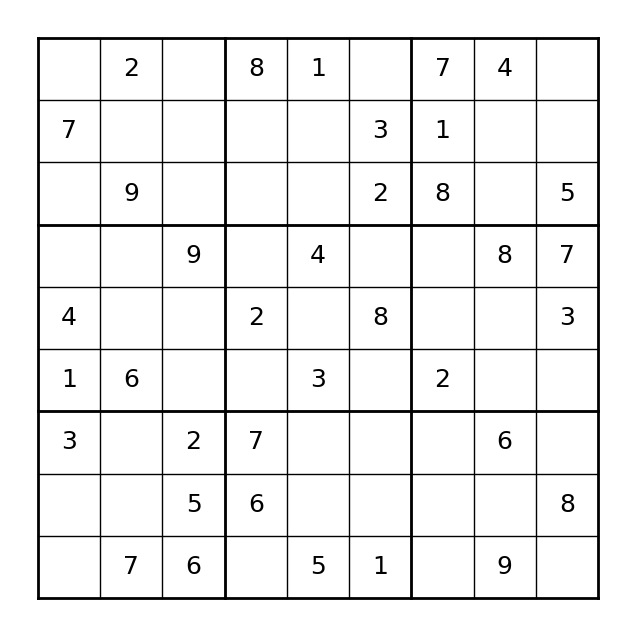

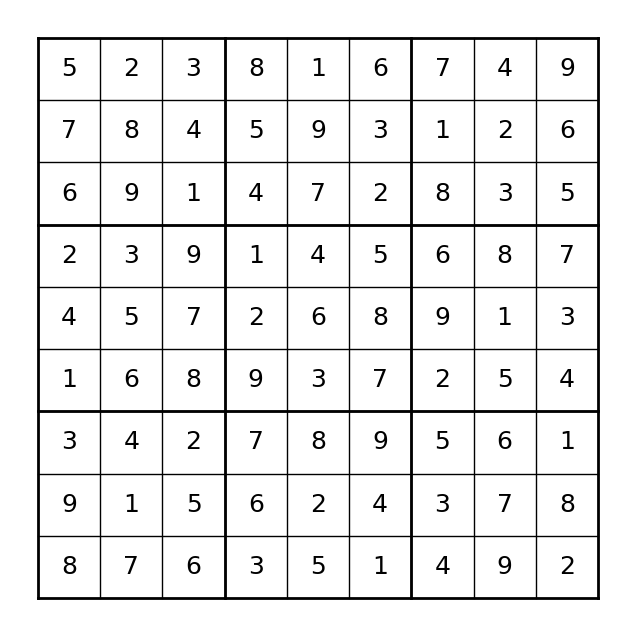

True


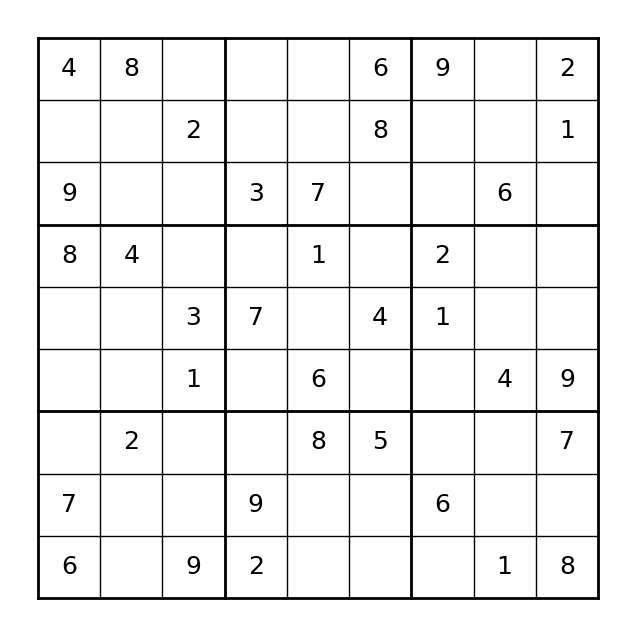

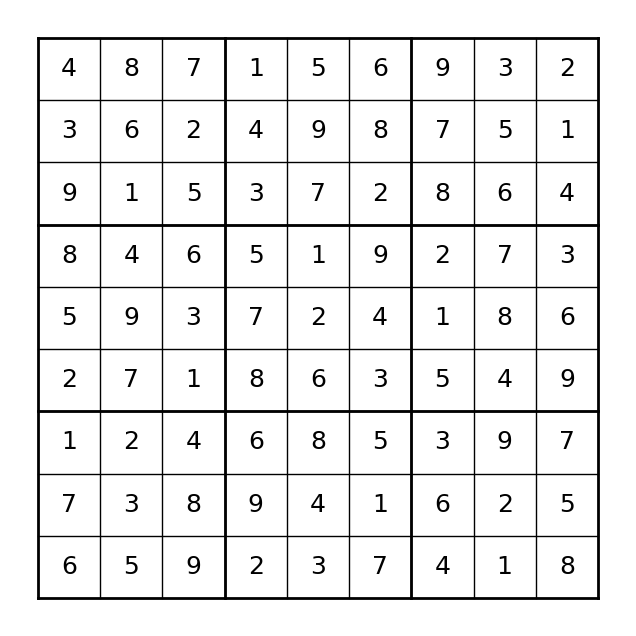

True


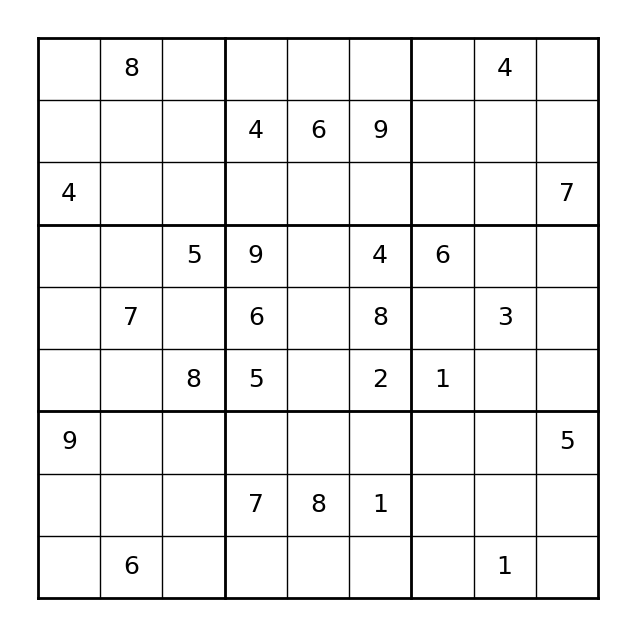

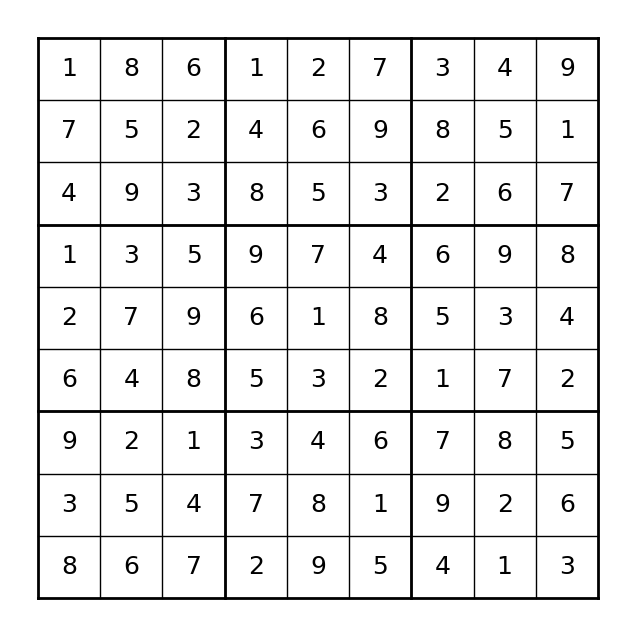

True


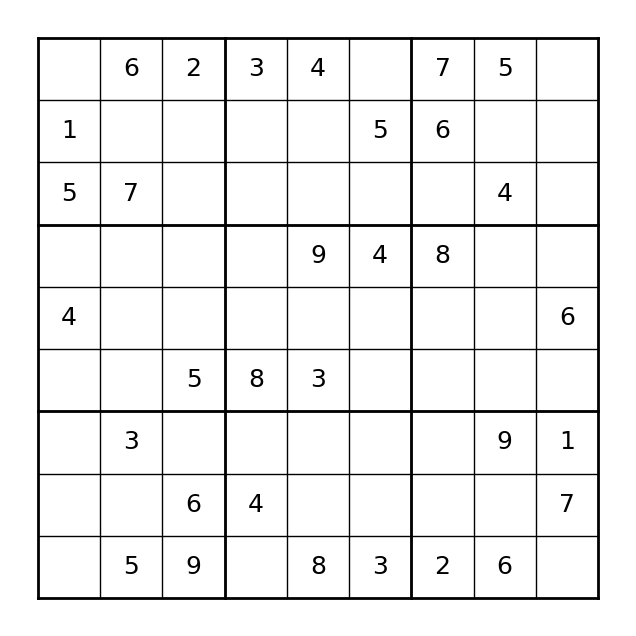

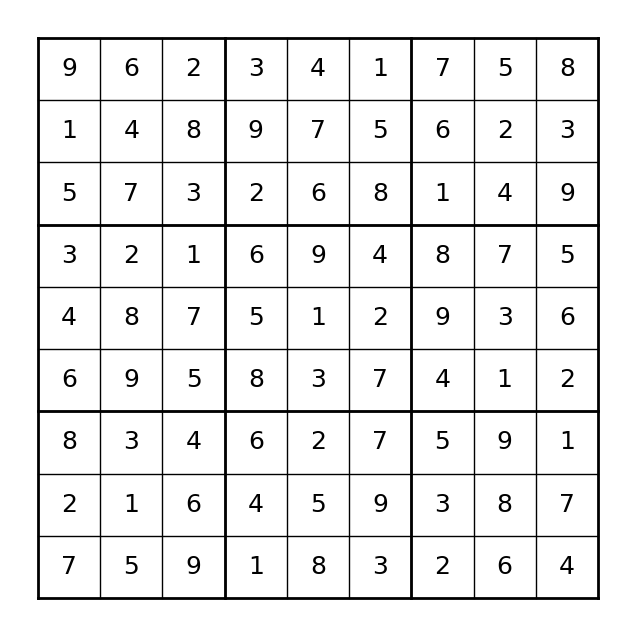

True


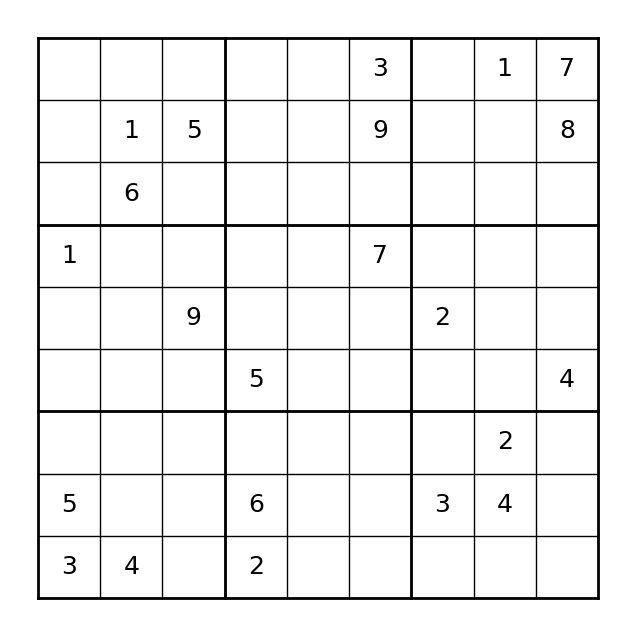

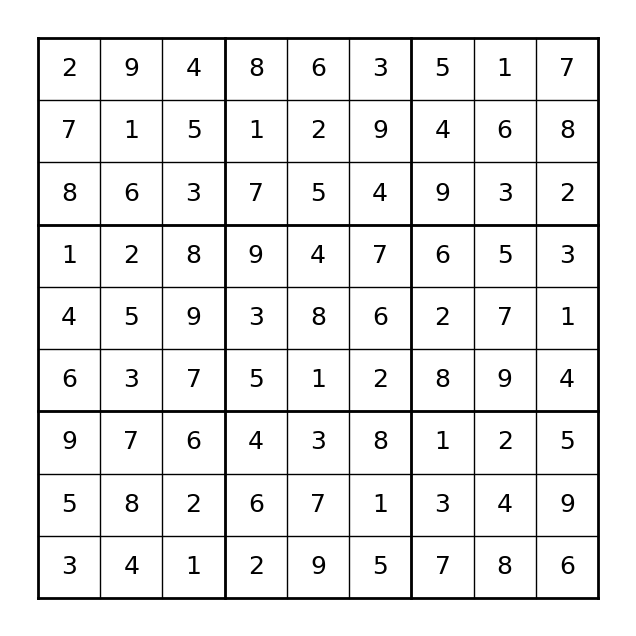

True


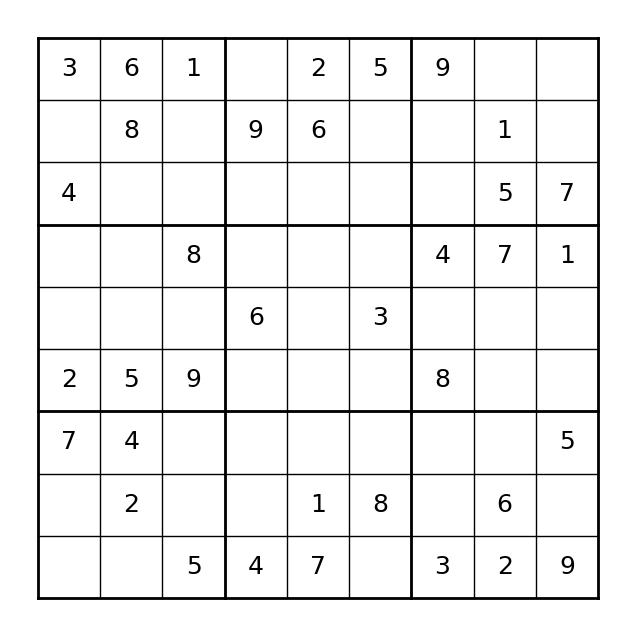

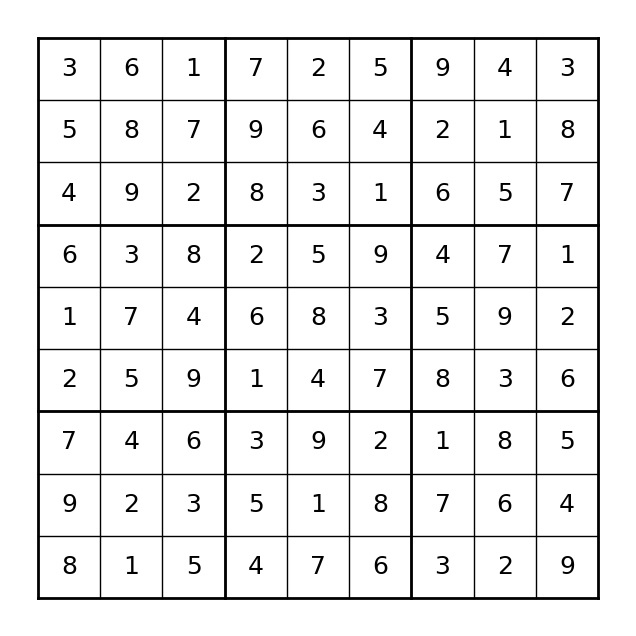

True


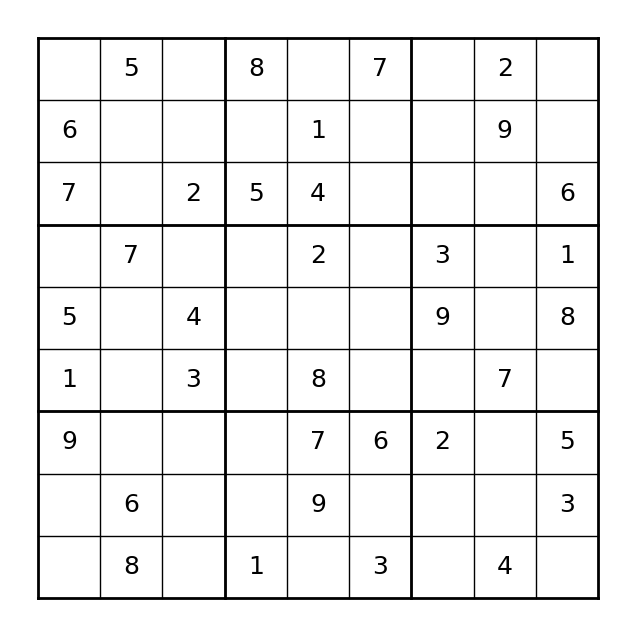

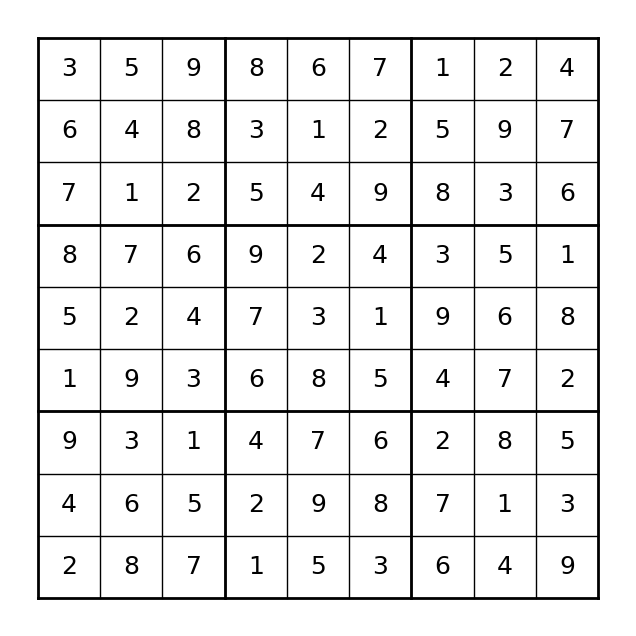

True


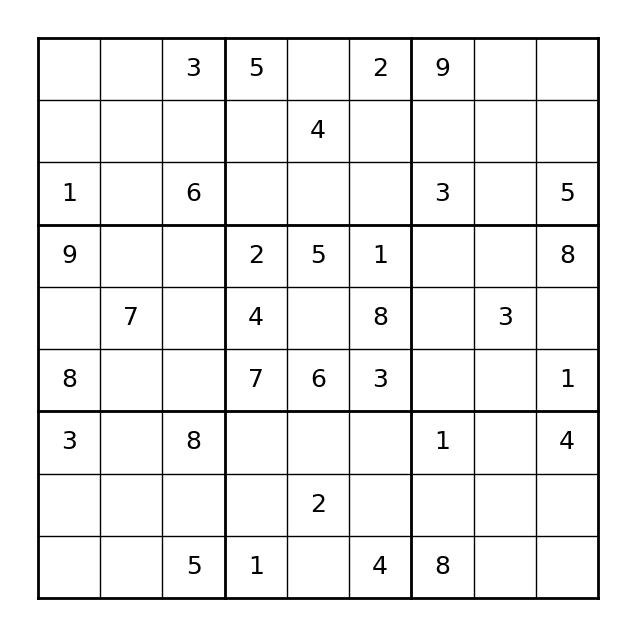

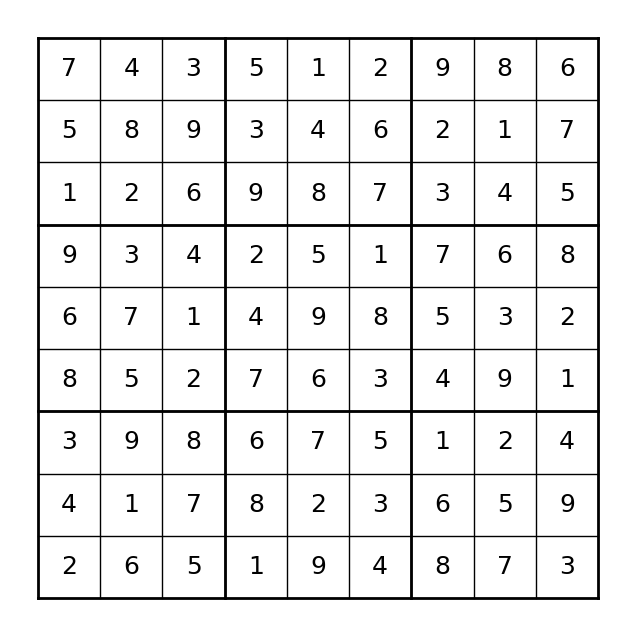

True


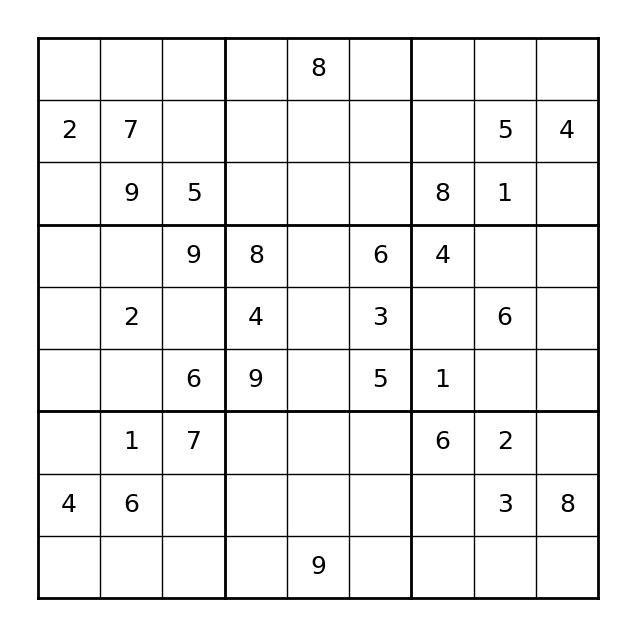

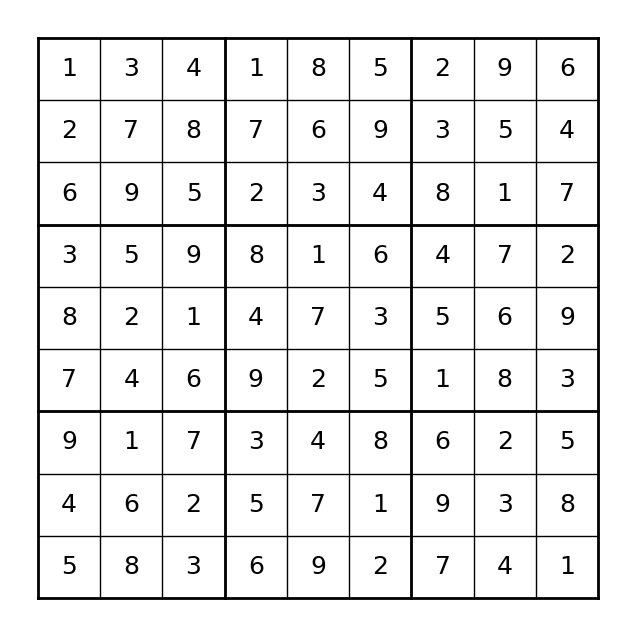

True


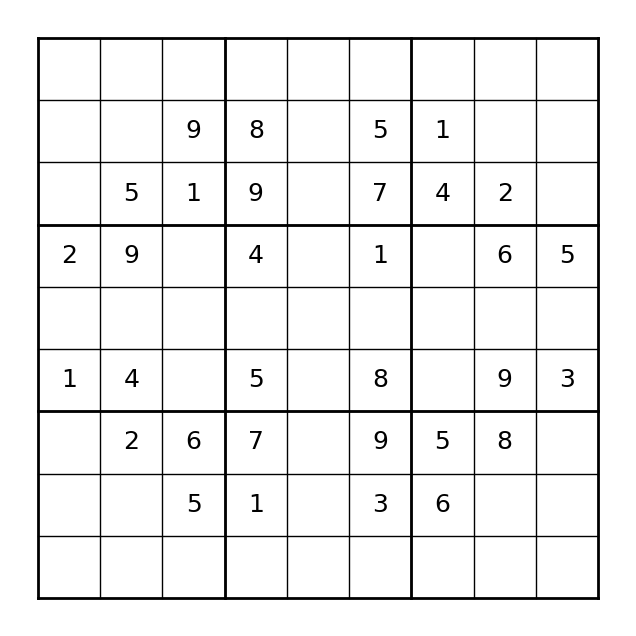

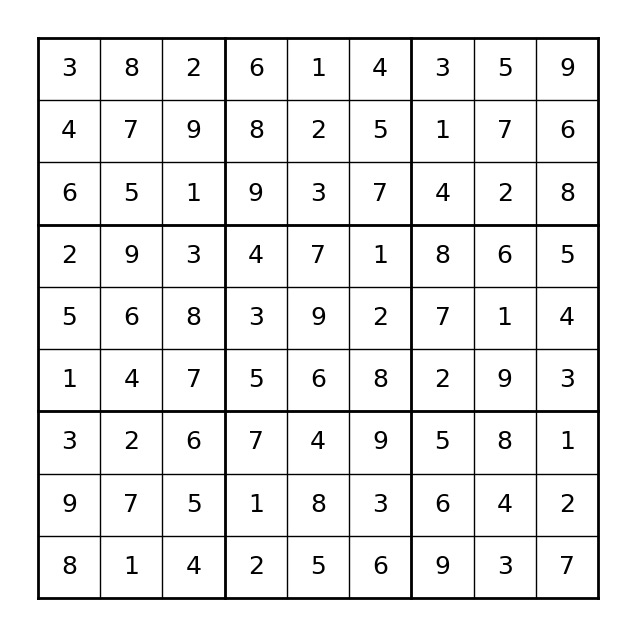

True


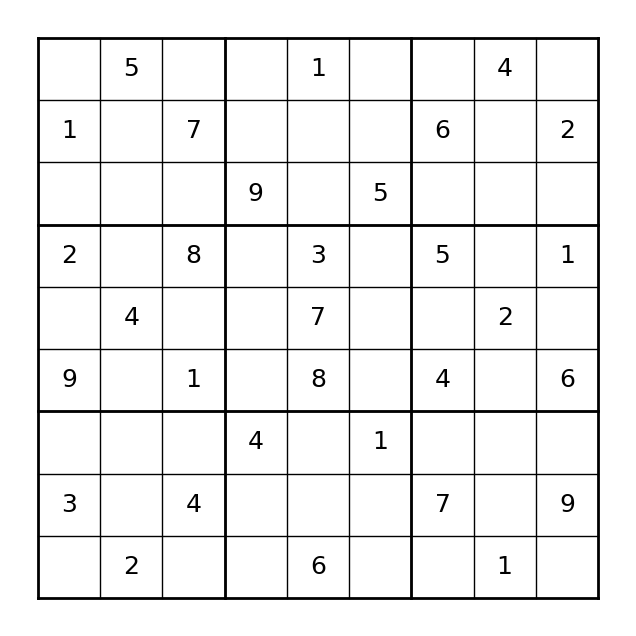

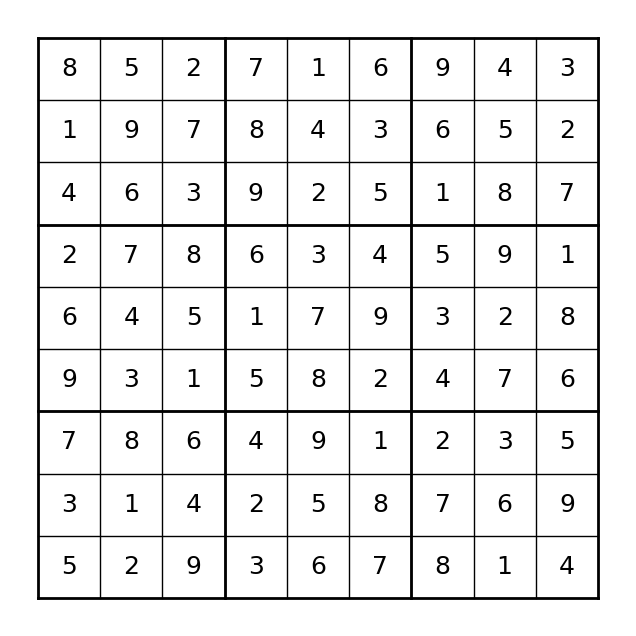

True


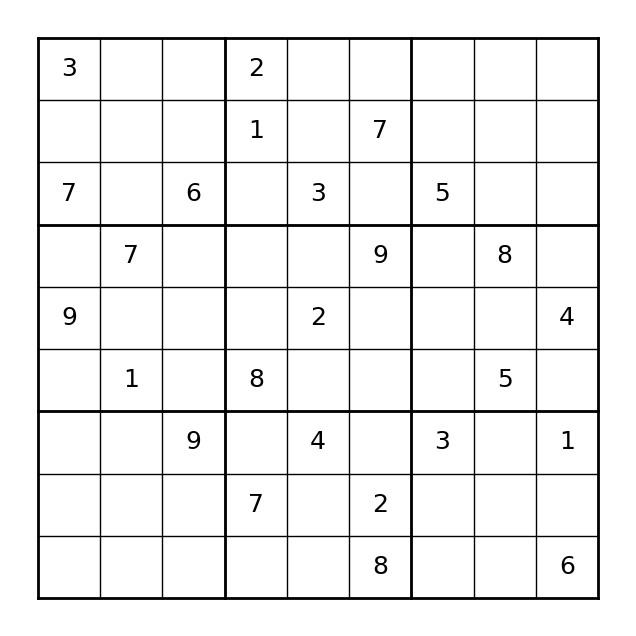

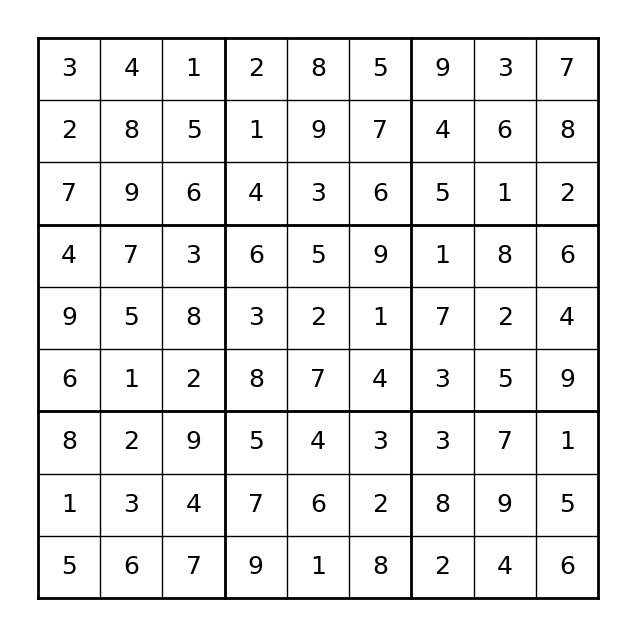

True


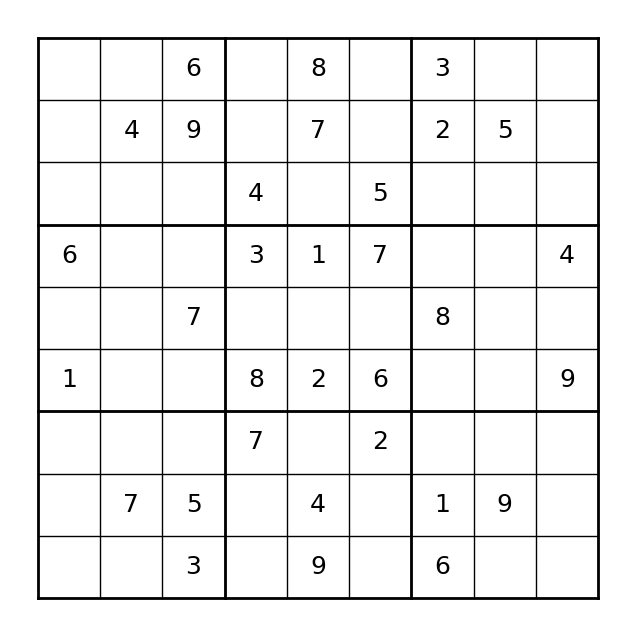

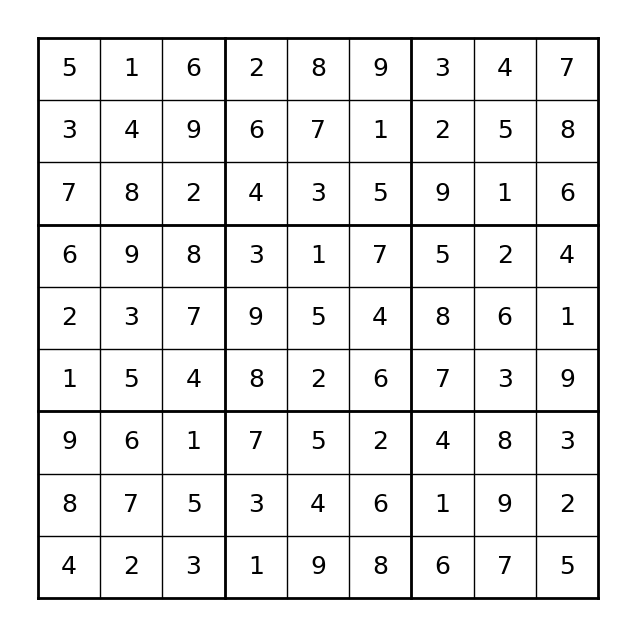

True


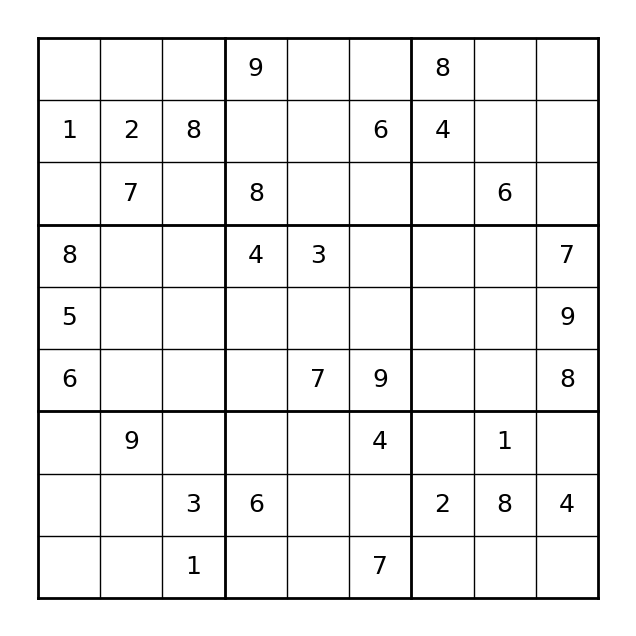

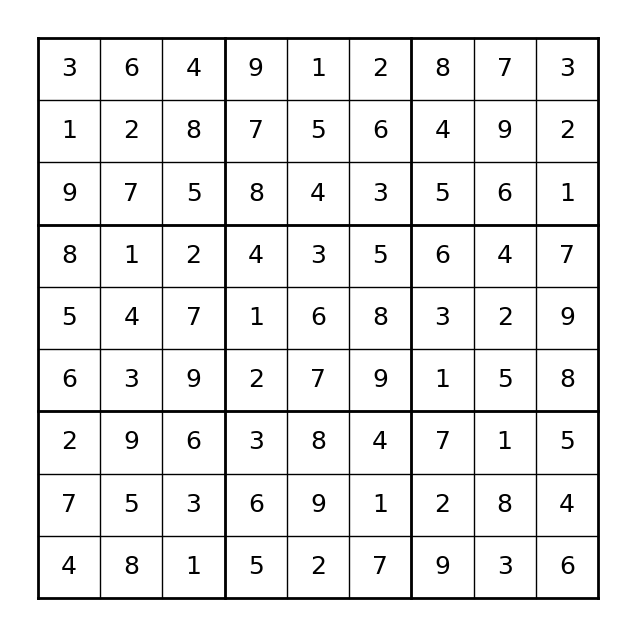

True


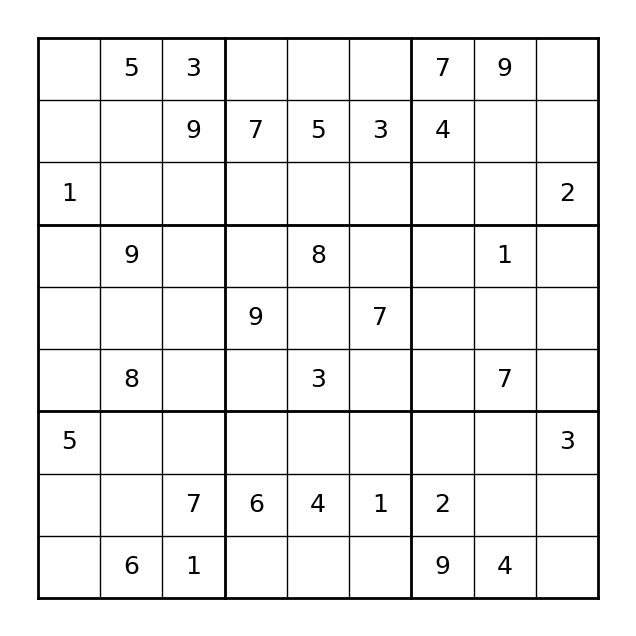

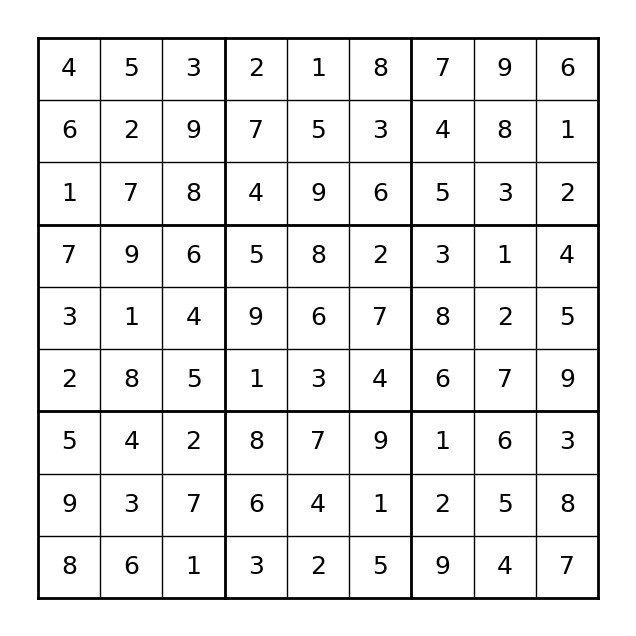

True


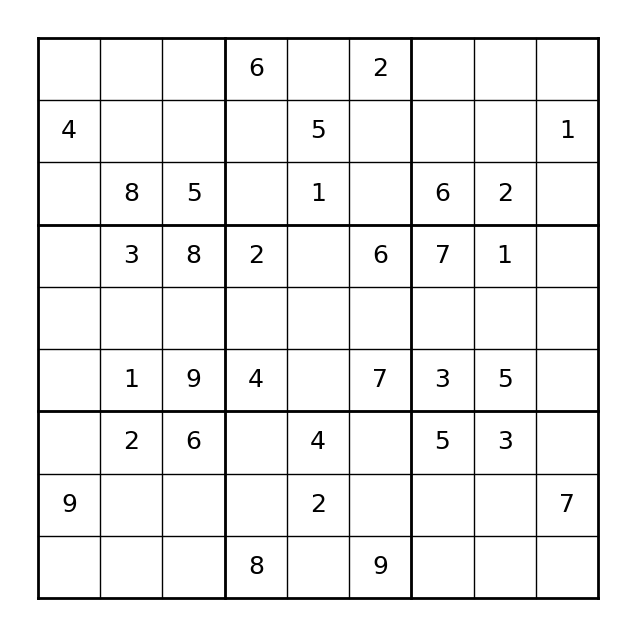

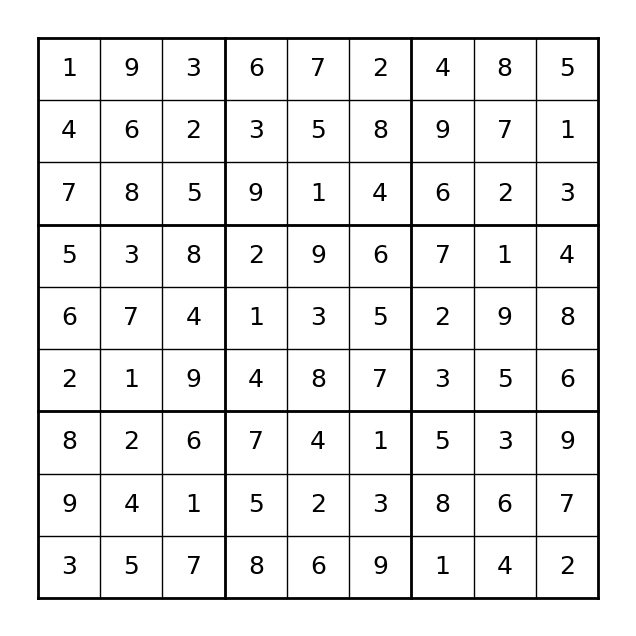

True


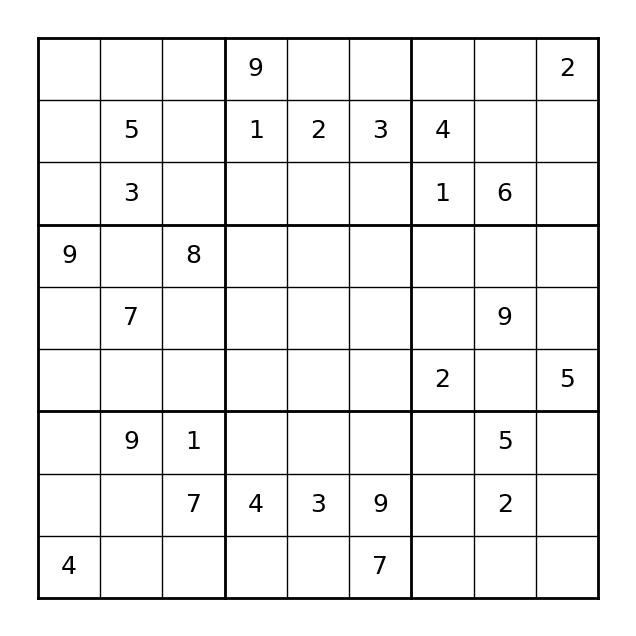

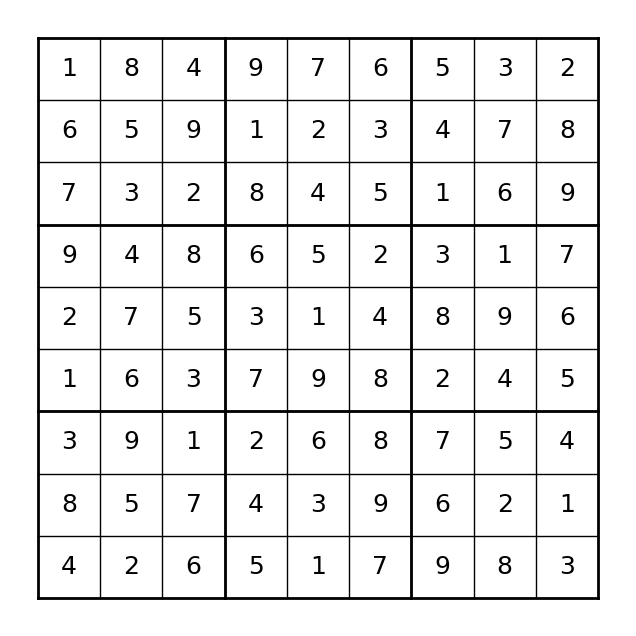

True


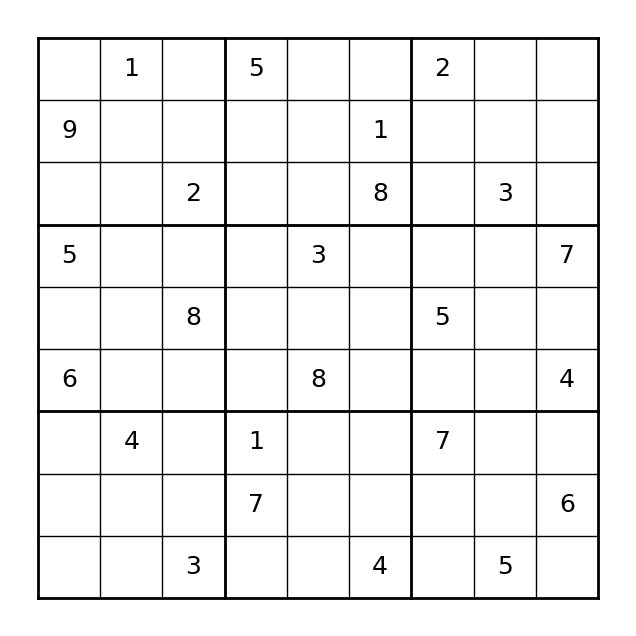

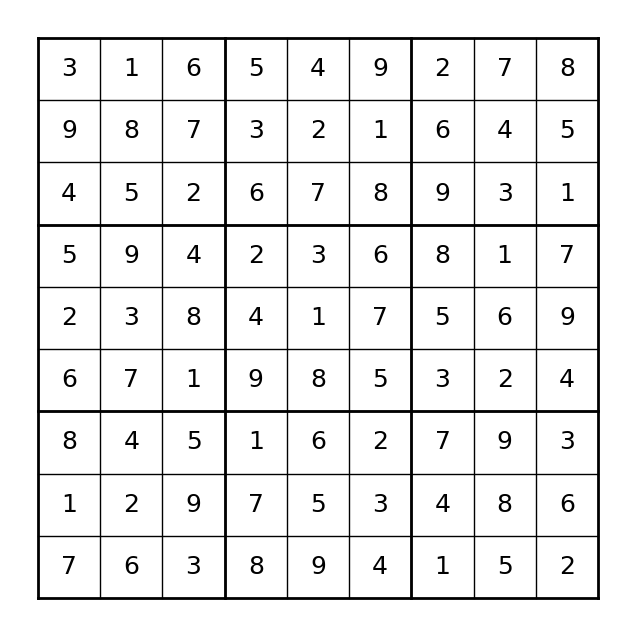

True


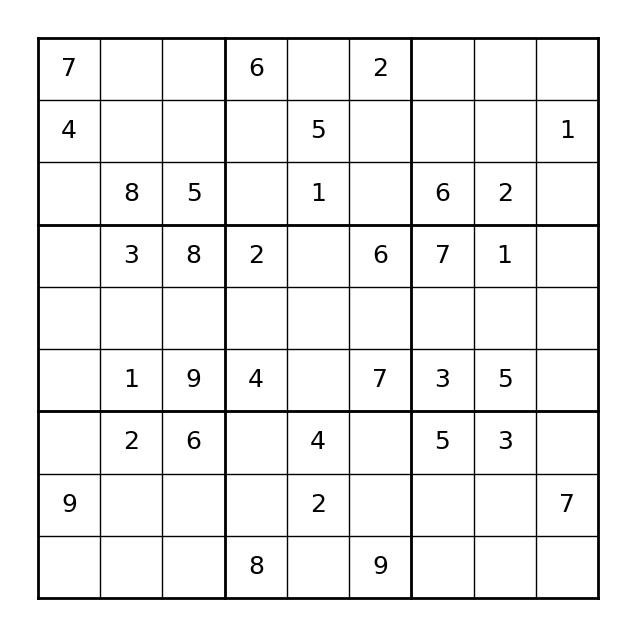

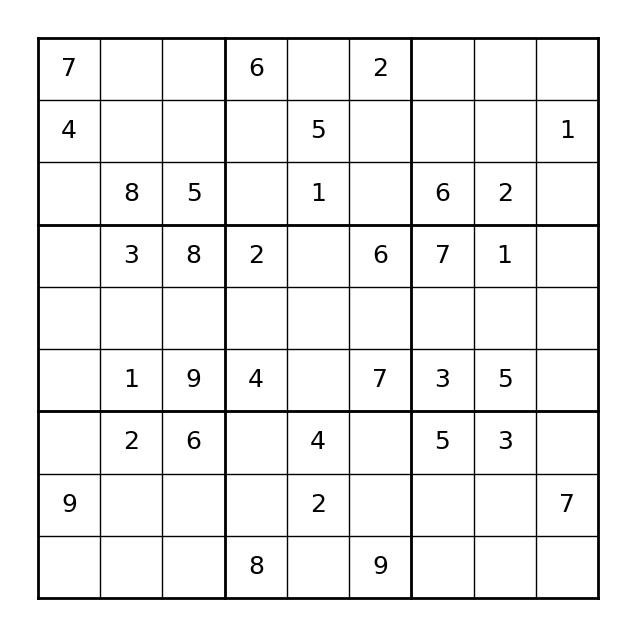

False
solved puzzles: 20
unsolved puzzles: 1
unsolvable puzzles: 0


In [ ]:
f = open("easy21.txt", "r")
count = [0,0,0]
ss = [s for s in f.read().split('\n')]
print(len(ss), 'strings read')
for s in ss:
  board = convert_to_board(s)
  sudoku = Sudoku(board)
  sudoku.draw()
  sol = sudoku.solve_backtrack()
  sudoku.draw()
  print(sol)
  count[sol]+=1

print('solved puzzles:',count[1])
print('unsolved puzzles:',count[0])
print('unsolvable puzzles:',count[-1])


Upload hard1000.txt file

All puzzles in file "hard1000.txt" are solvable with backtracking.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hard1000.txt to hard1000.txt


11 strings read


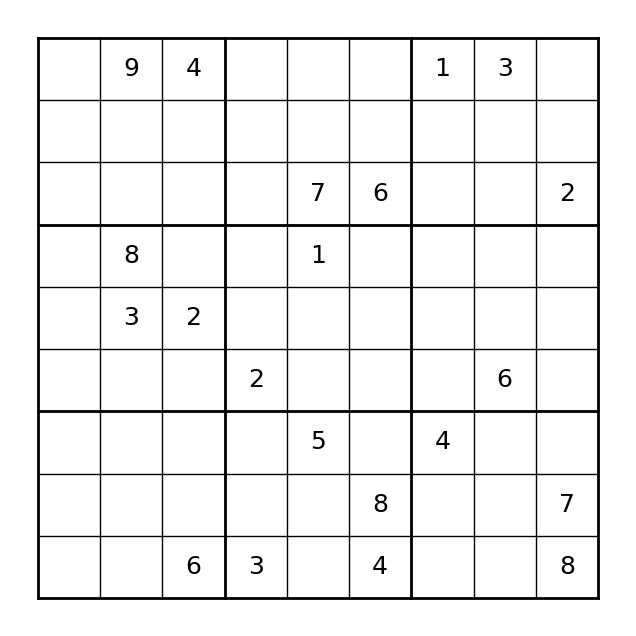

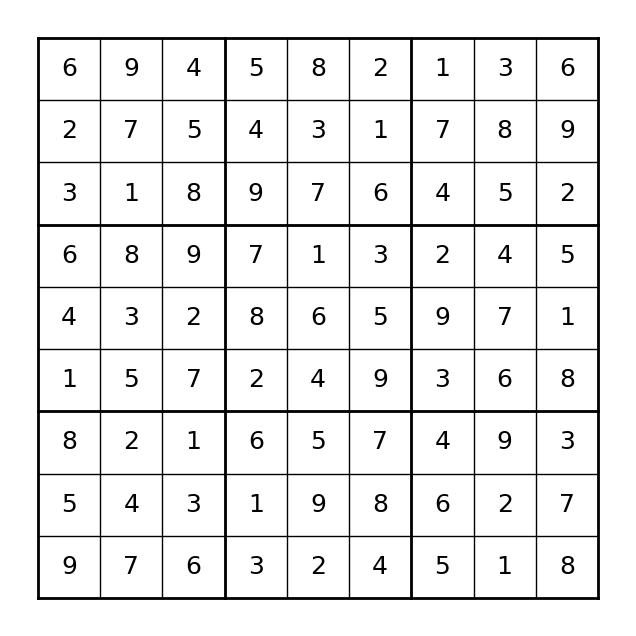

solve_backtrack(s) result:
 True


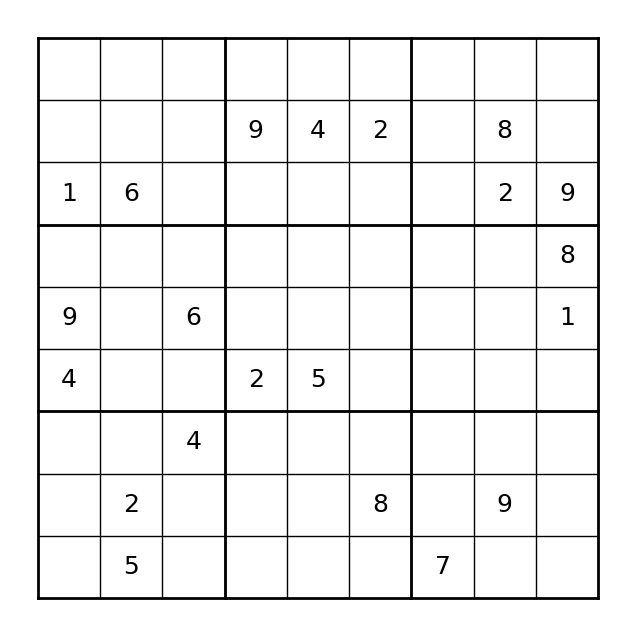

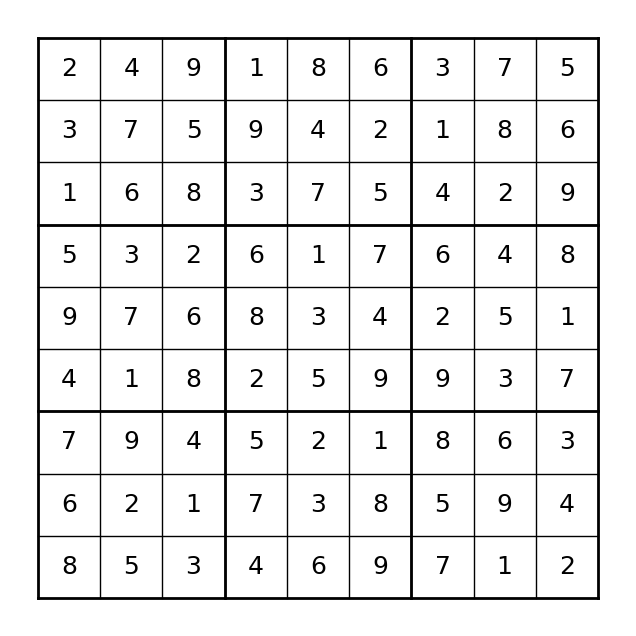

solve_backtrack(s) result:
 True


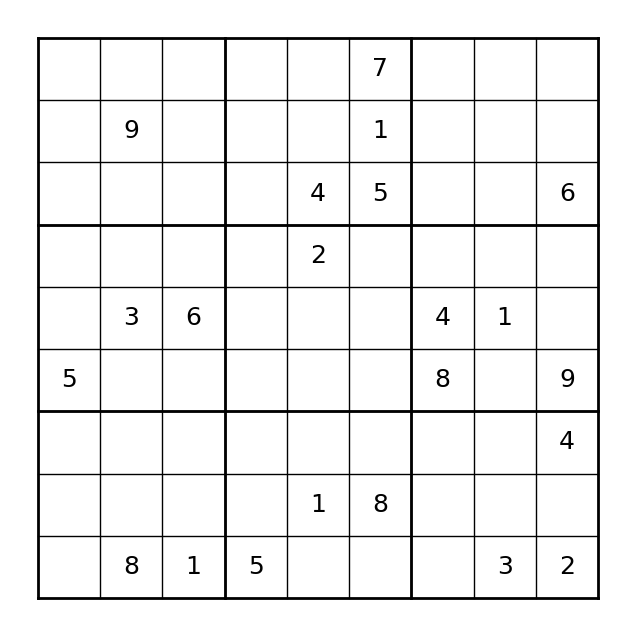

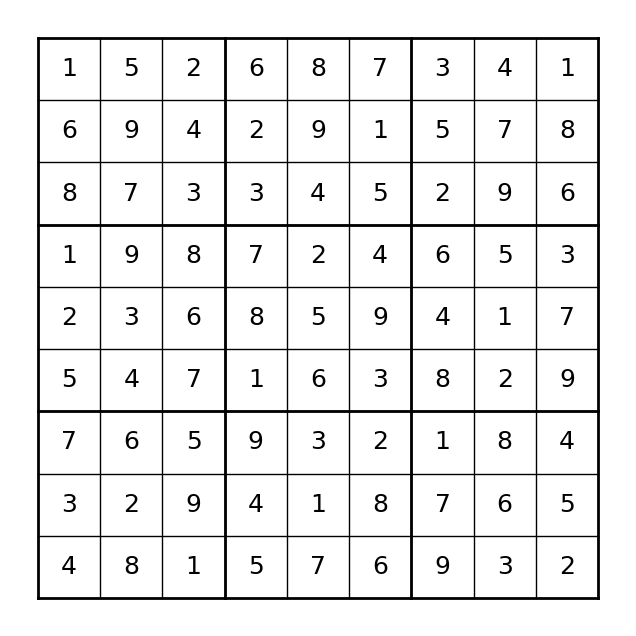

solve_backtrack(s) result:
 True


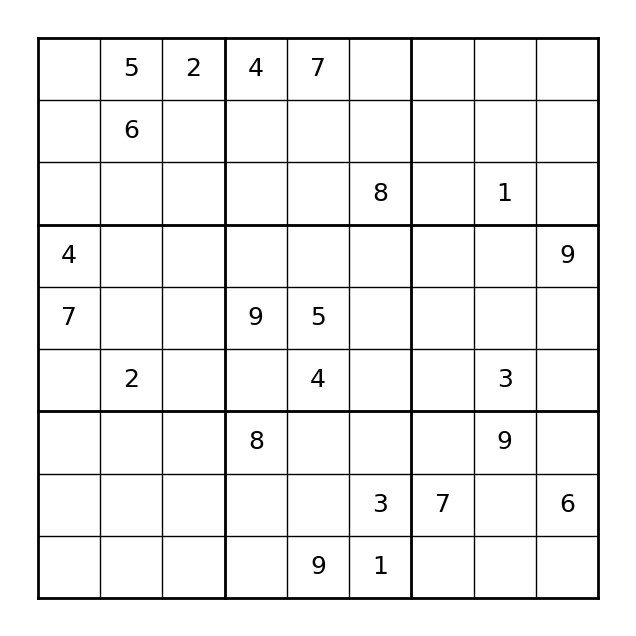

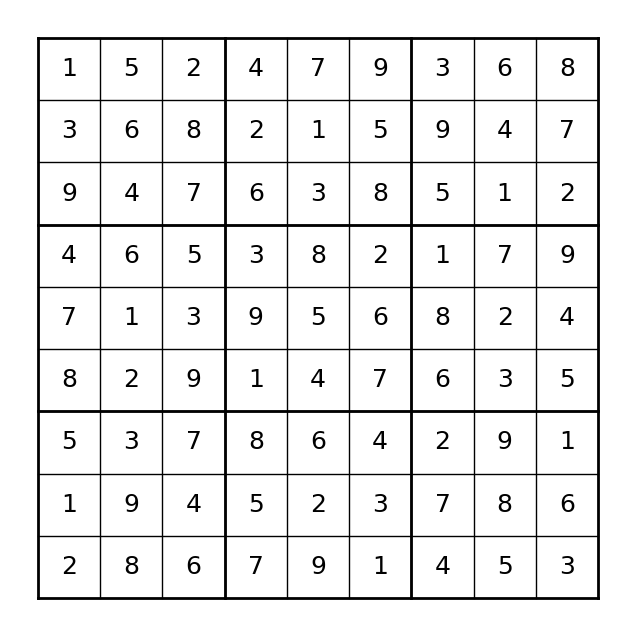

solve_backtrack(s) result:
 True


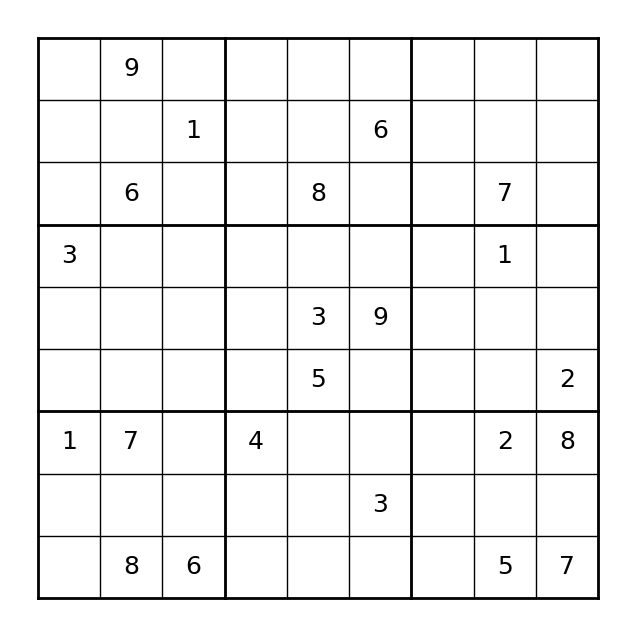

In [ ]:
import time
f = open("hard1000.txt", "r")
count = [0,0,0]
ss = [s for s in f.read().split('\n')]
print(len(ss), 'strings read')
start = time.time()
for s in ss[:10]: # Pick the first few files for your initial experiments. Later you can try solving all of them
  board = convert_to_board(s)
  sudoku = Sudoku(board)
  sudoku.draw()
  sol = sudoku.solve_backtrack()
  sudoku.draw()
  print('solve_backtrack(s) result:\n',sol)
  if sol!=None:
    count[1]+=1
  else:
    count[-1]+=1
elapsed_time2 = time.time() - start
print('elapsed time using set', elapsed_time2,'secs')

print('solved puzzles:',count[1])
print('unsolved puzzles:',count[0])
print('unsolvable puzzles:',count[-1])

## Deadlines

1. Check-in - October 24, 2024 at 11:59pm
    *   Your code will not be graded, however, this check-in is required to earn credit on the lab. You will submit your progress up to this point (At minimum you should have Parts 1 and a majority of 2 completed). You will be evaluated only on the amount of progress that you have made (i.e., 1 - satisfactory progress, 0-unsatisfactory progress); solutions do not yet need to be complete, but should be reasonably progressed.
    *   Submit your progress by uploading the .ipynb file on Blackboard under "Lab 2 - Check-In"
2. Final Submission - October 31, 2024 at 11:59pm
    *   You should submit a completed lab assignment to include all appropriate source code above



## How to Submit

1. File > Download .ipynb
2. Go to Blackboard, find the submission page, and upload the .ipynb file you just downloaded.
